# Importation : 

In [1]:
import numpy as np #  algebre lineaire
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #dataviz
import seaborn as sns  #dataviz




import plotly.express as ex
import plotly.graph_objs as go


# Loading Data 

In [2]:
raw_data = pd.read_csv('C:\\Users\\lenovo\\Desktop\\data.csv', encoding='latin1')

In [3]:
raw_data.head()

Season    Cultivar  Repetition     PH    IFP    NLP     NGP   NGL   NS  \
0       1  NEO 760 CE           1  58.80  15.20   98.2  177.80  1.81  5.2   
1       1  NEO 760 CE           2  58.60  13.40  102.0  195.00  1.85  7.2   
2       1  NEO 760 CE           3  63.40  17.20  100.4  203.00  2.02  6.8   
3       1  NEO 760 CE           4  60.27  15.27  100.2  191.93  1.89  6.4   
4       1   MANU IPRO           1  81.20  18.00   98.8  173.00  1.75  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99

In [5]:
raw_data.shape

(320, 11)

In [6]:
raw_data.columns

Index(['Season', 'Cultivar', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL',
       'NS', 'MHG', 'GY'],
      dtype='object')

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [8]:
raw_data.describe() 

Season  Repetition          PH       IFP         NLP         NGP  \
count  320.000000  320.000000  320.000000  320.0000  320.000000  320.000000   
mean     1.500000    2.500000   68.386781   15.4650   59.088313  135.085844   
std      0.500783    1.119785    8.958194    3.0243   20.068187   60.494529   
min      1.000000    1.000000   47.600000    7.2000   20.200000   47.800000   
25%      1.000000    1.750000   62.950000   13.6000   44.350000   95.052500   
50%      1.500000    2.500000   67.200000   15.6000   54.500000  123.000000   
75%      2.000000    3.250000   74.347500   17.3300   71.220000  161.350000   
max      2.000000    4.000000   94.800000   26.4000  123.000000  683.400000   

              NGL          NS         MHG           GY  
count  320.000000  320.000000  320.000000   320.000000  
mean     2.290844    4.071656  168.322313  3418.553794  
std      0.840116    1.474531   19.625566   503.003602  
min      0.940000    0.400000  127.060000  1538.230000  
25%      2.000000    3.000000  153.845000  3126.611552  
50%      2.280000    3.800000  166.150000  3397.276724  
75%      2.480000    5.000000  183.182500  3708.262931  
max     14.860000    9.000000  216.000000  4930.000000

In [9]:
raw_data.head()

Season    Cultivar  Repetition     PH    IFP    NLP     NGP   NGL   NS  \
0       1  NEO 760 CE           1  58.80  15.20   98.2  177.80  1.81  5.2   
1       1  NEO 760 CE           2  58.60  13.40  102.0  195.00  1.85  7.2   
2       1  NEO 760 CE           3  63.40  17.20  100.4  203.00  2.02  6.8   
3       1  NEO 760 CE           4  60.27  15.27  100.2  191.93  1.89  6.4   
4       1   MANU IPRO           1  81.20  18.00   98.8  173.00  1.75  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99

# EDA

In [5]:
data_eda = raw_data
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [6]:
categories = list(data_eda.columns)
categories

['Season',
 'Cultivar',
 'Repetition',
 'PH',
 'IFP',
 'NLP',
 'NGP',
 'NGL',
 'NS',
 'MHG',
 'GY']

<h3>Analyse univariee</h3>

In [7]:

def pltCountplot(cats):
    
    fig, axis = plt.subplots(len(cats) // 2 ,2, figsize=(70,40))  

    index = 0
    for i in range(len(cats) // 2):
        for j in range(2):
            
            ax = sns.countplot(x=cats[index], data=data_eda, ax=axis[i][j])
            
            if cats[index] in ['Cultivar', 'NGP', 'MHG', 'GY']:
                for item in ax.get_xticklabels():
                    item.set_rotation(40)
            
            if cats[index] in ['age']:
                for item in ax.get_xticklabels():
                    item.set_rotation(90)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data_eda)*100),
                        ha="center") 
            index += 1

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


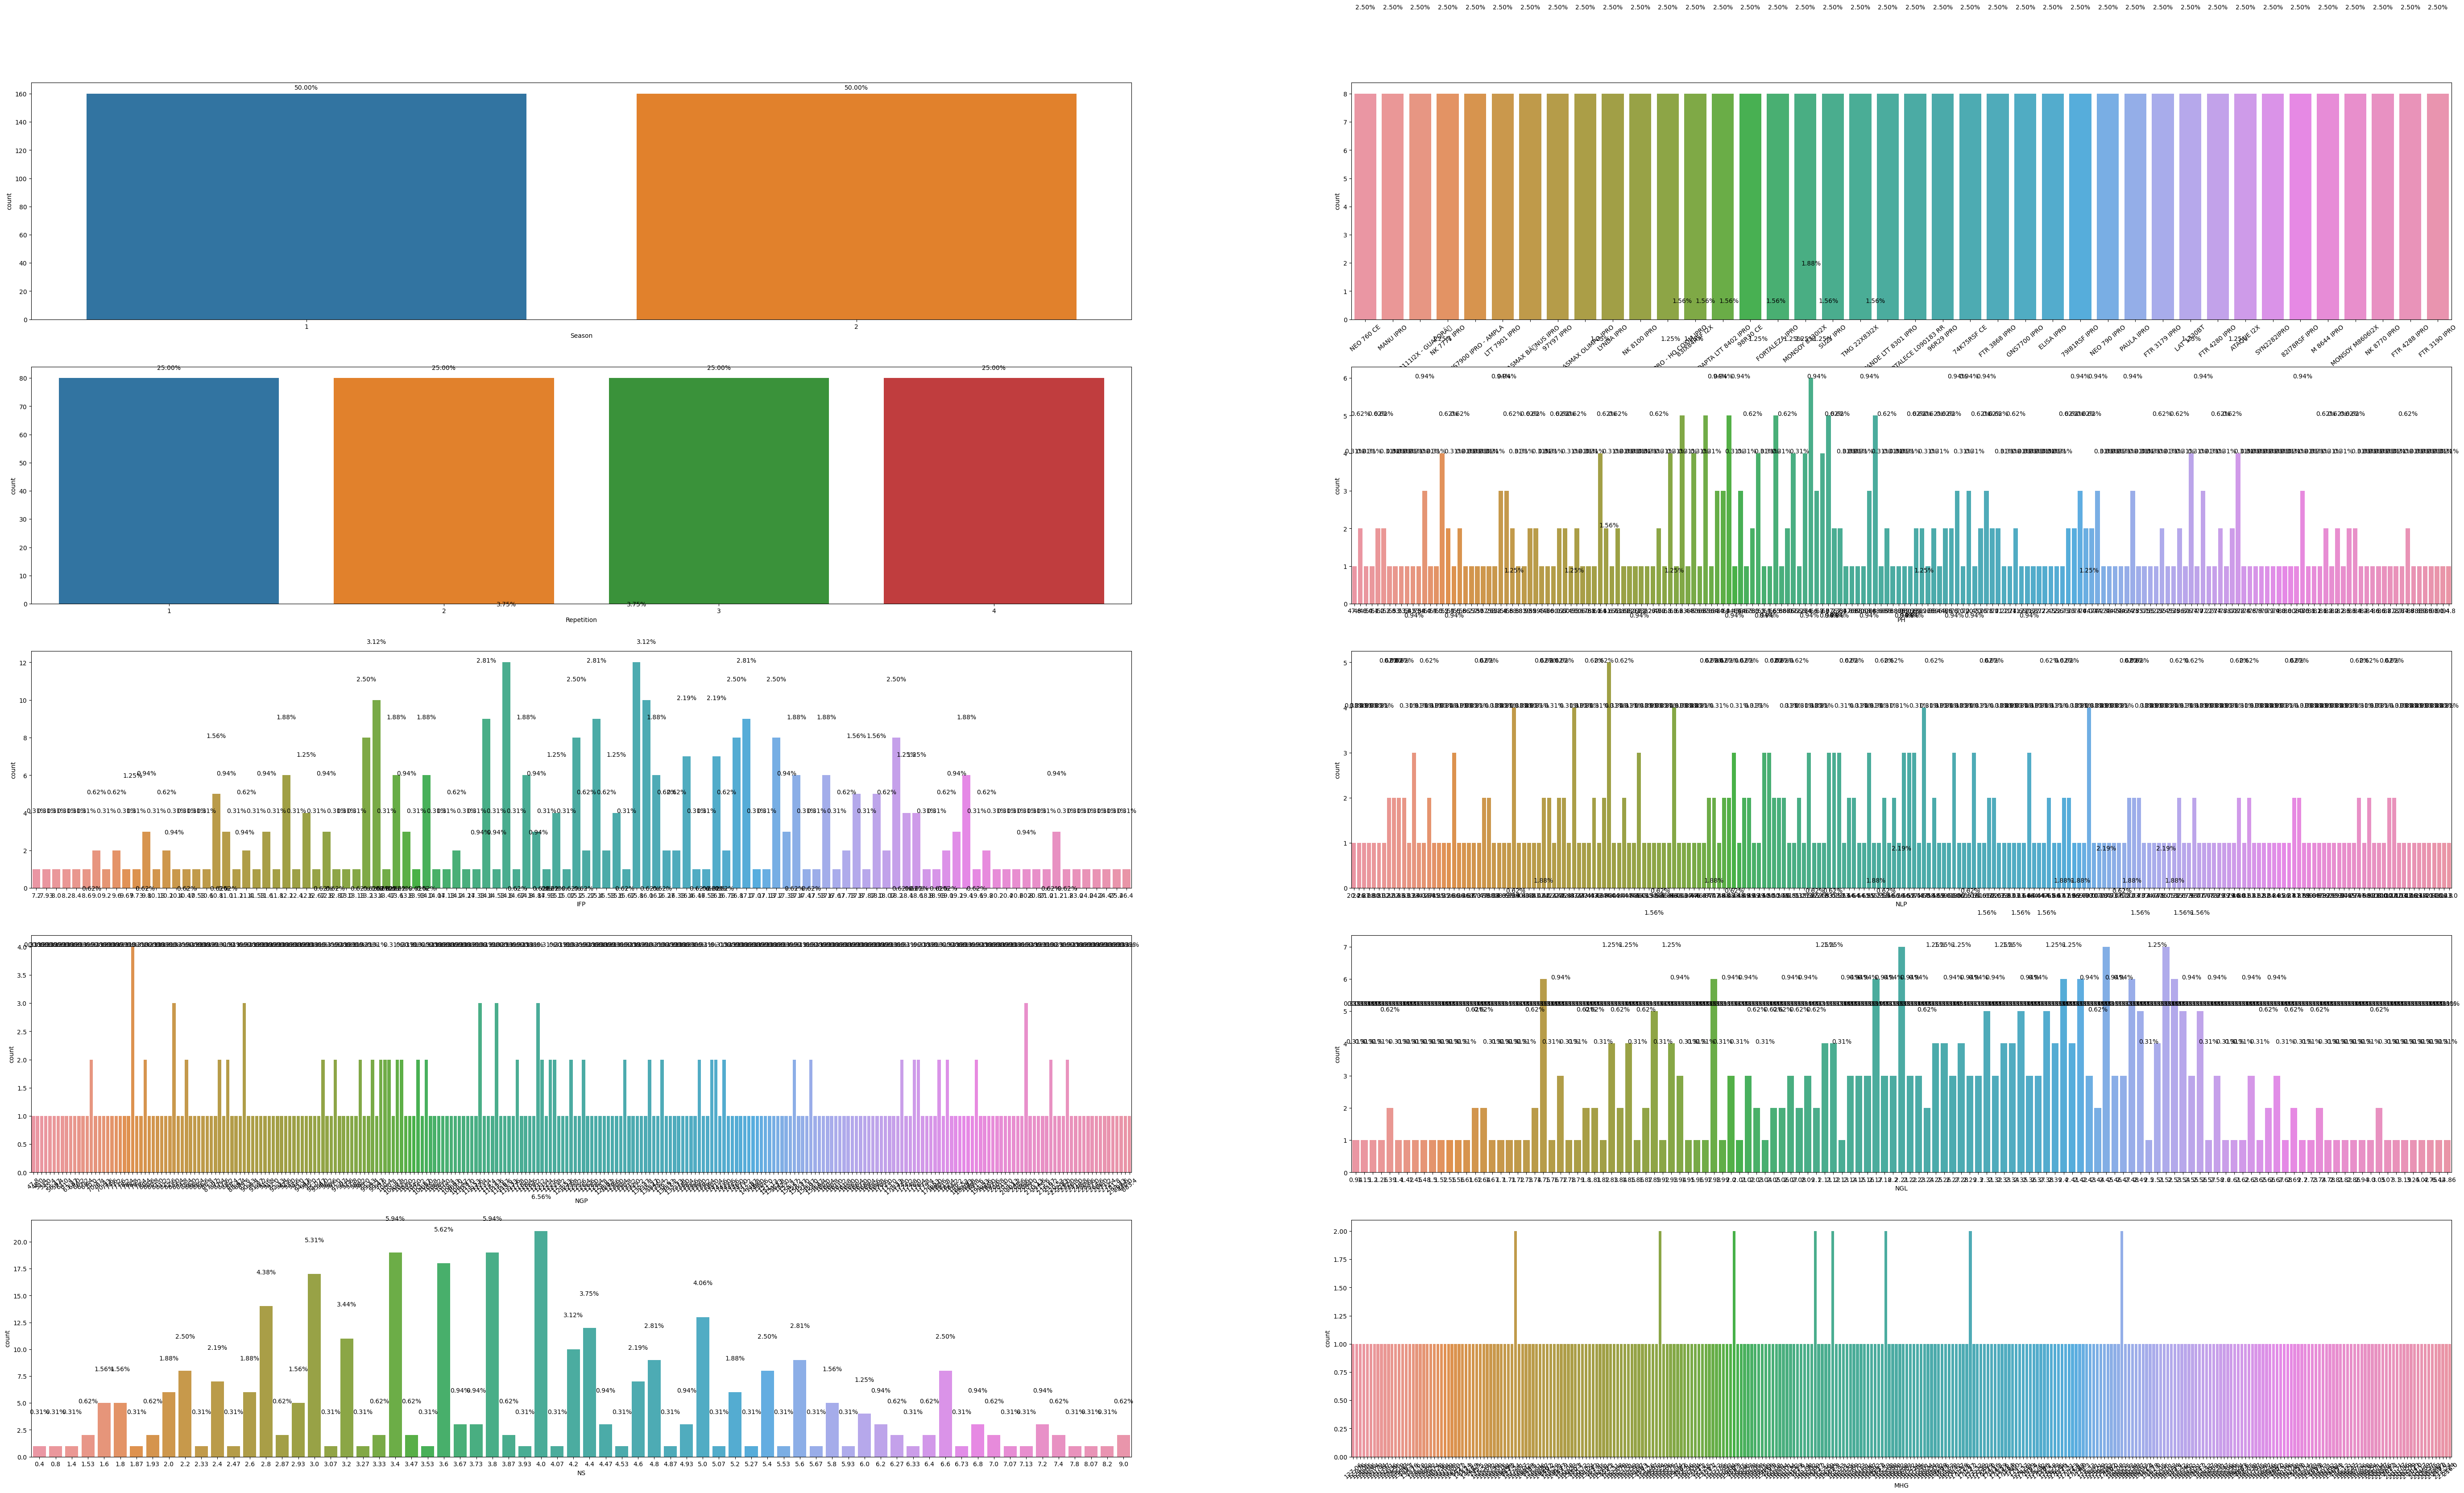

In [8]:
pltCountplot(categories)

In [ ]:
def plotDistPlot(columns):
    fig, ax = plt.subplots(len(columns)//2, 2,figsize=(20, 12))
    
    index = 0
    for i in range(2):
        for j in range(3):
            sns.histplot(data.loc[:, columns[index]],
                         stat="density",
                         kde=True,
                         ax=ax[i][j])
            ax[i][j].set_title(columns[index])
            ax[i][j].legend(labels=['Normal', 'Actual'])
            index += 1

In [ ]:
plotDistPlot(categories)

<h4>Distribution

In [ ]:
def destr(x):
    plt.figure(figsize=(15,8))
    sns.histplot(data[x], color = 'green',stat="density",
                             kde=True,)
    age_mean = data[x].mean()
    plt.vlines(age_mean, 0, 0.05, color = 'green')
    print('Age mean : ', age_mean)
    print('Age median : ', data[x].median())

In [4]:
L_num = ['Season', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']

In [ ]:
for x in L_num:
    destr(x)

<h3>Analyse bivariee</h3>

In [14]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [17]:
#NGL
def pltCountplotHueTarget(cats, target):
    
    fig, axis = plt.subplots(len(cats) // 2,2, figsize=(20, 12))  

    index = 0
    for i in range(len(cats) // 2):
        for j in range(2):
            
            ax = sns.countplot(x=cats[index], data=data_eda, hue=target, ax=axis[i][j])
            
            if cats[index] in ['Cultivar', 'NGP', 'MHG', 'GY']:
                for item in ax.get_xticklabels():
                    item.set_rotation(40)
                    
            if cats[index] in ['age']:
                for item in ax.get_xticklabels():
                    item.set_rotation(45)
                
            for p in ax.patches:
                height = p.get_height()
                ax.text(p.get_x()+p.get_width()/2.,
                        height + 3,
                        '{:1.2f}%'.format(height/len(data_eda)*100),
                        ha="center") 
            index += 1

In [ ]:
pltCountplotHueTarget(categories, 'NGL')

In [12]:
categories

['Season',
 'Cultivar',
 'Repetition',
 'PH',
 'IFP',
 'NLP',
 'NGP',
 'NGL',
 'NS',
 'MHG',
 'GY']

NameError: name 'Season' is not defined

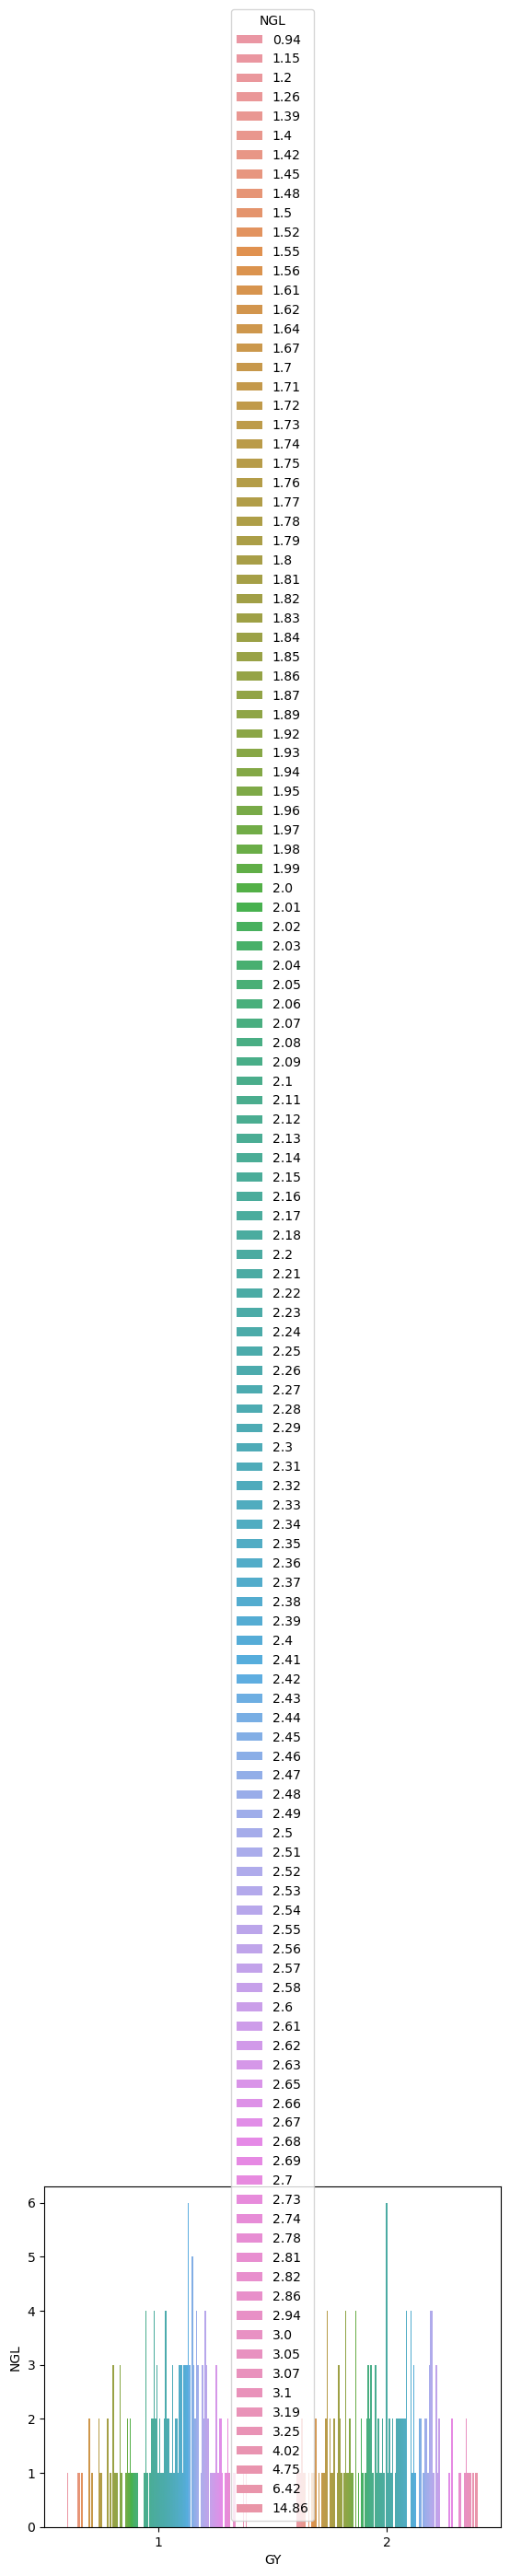

In [16]:
sns.countplot(x='Season',hue="NGL",data=data_eda)
plt.xlabel(cat)
plt.ylabel('NGL')
plt.title(Season+" vs  NGL")
#plt.legend(cat+" vs  y")
plt.show()

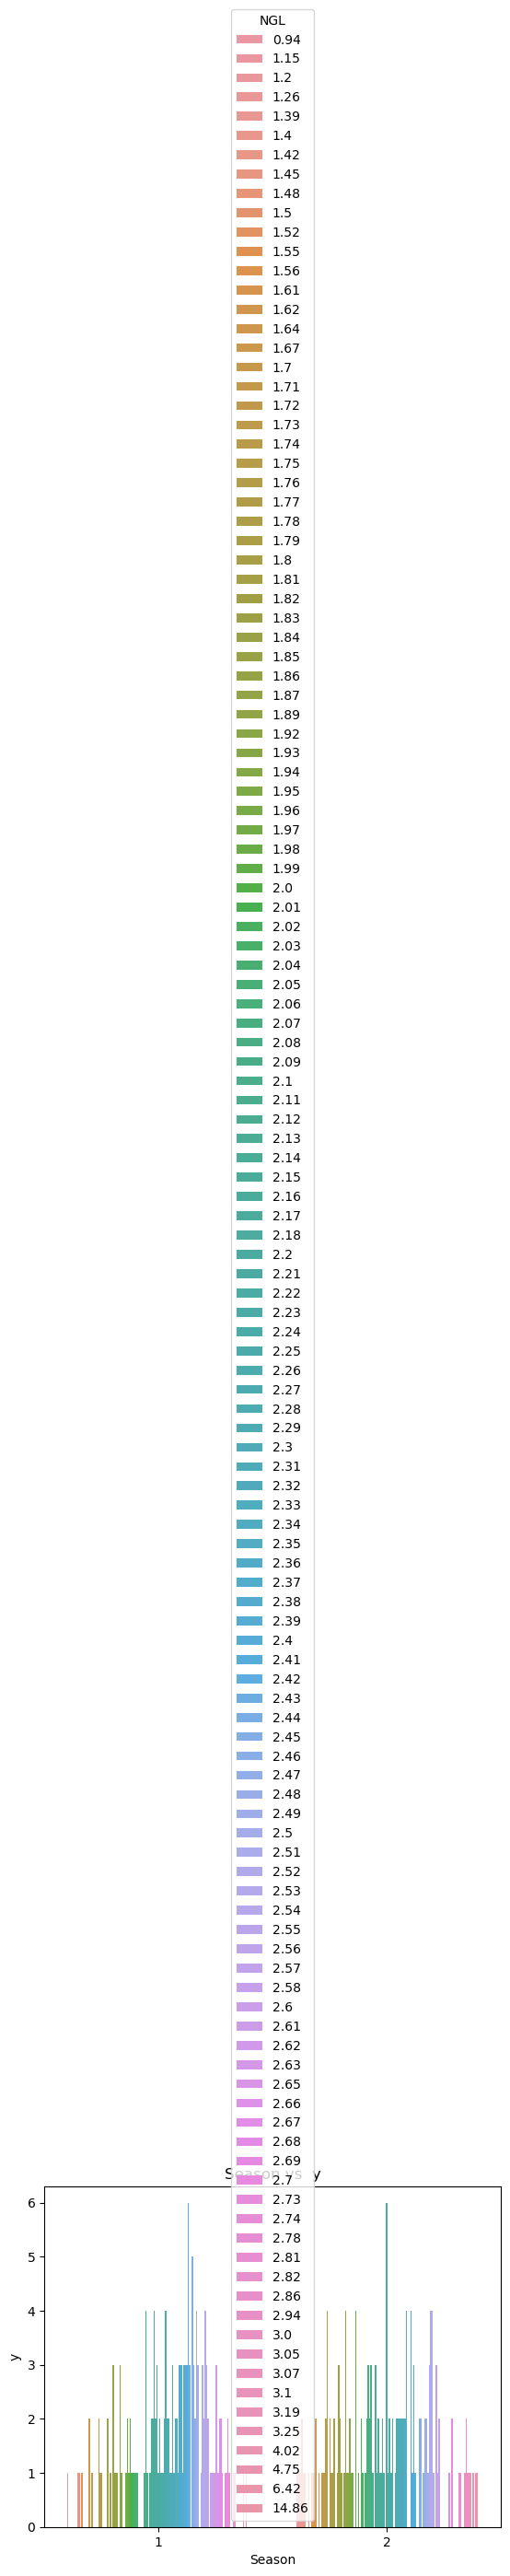

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


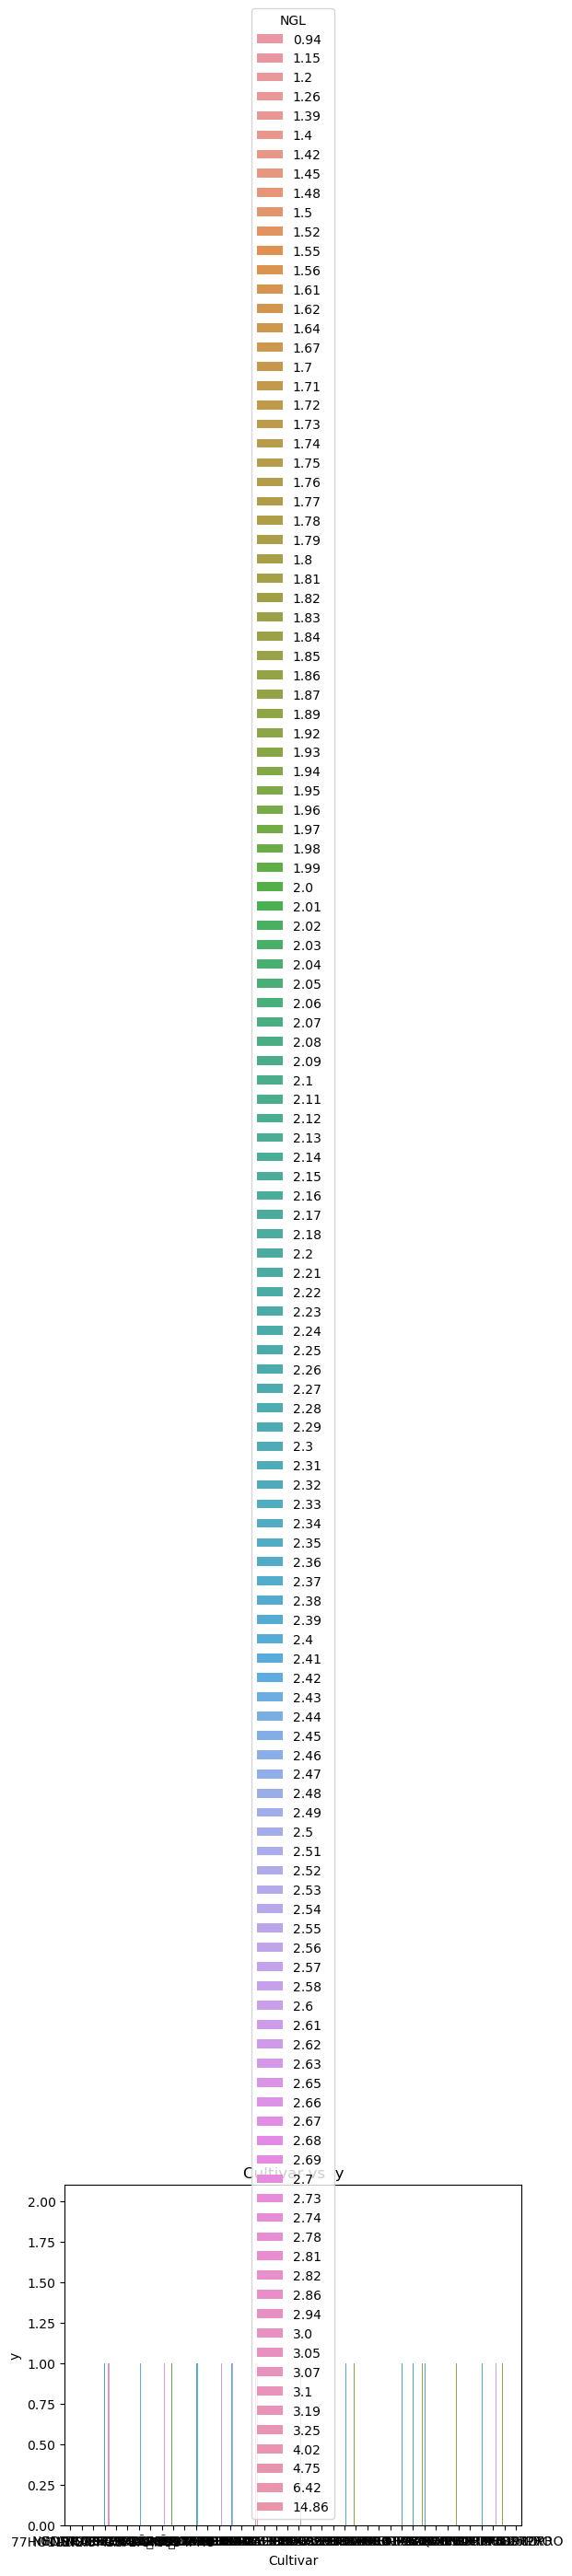

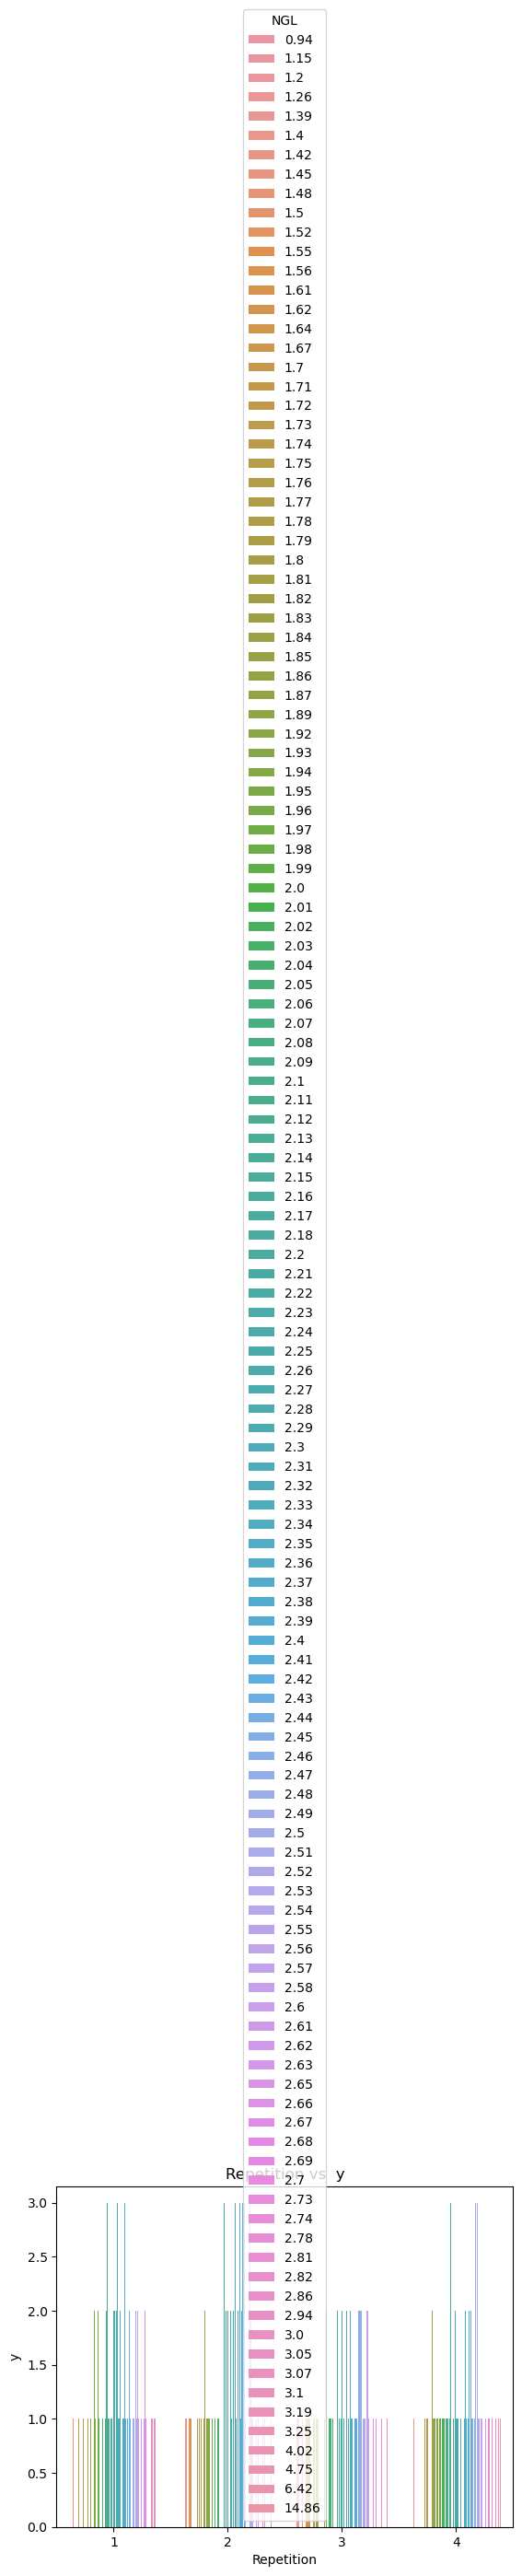

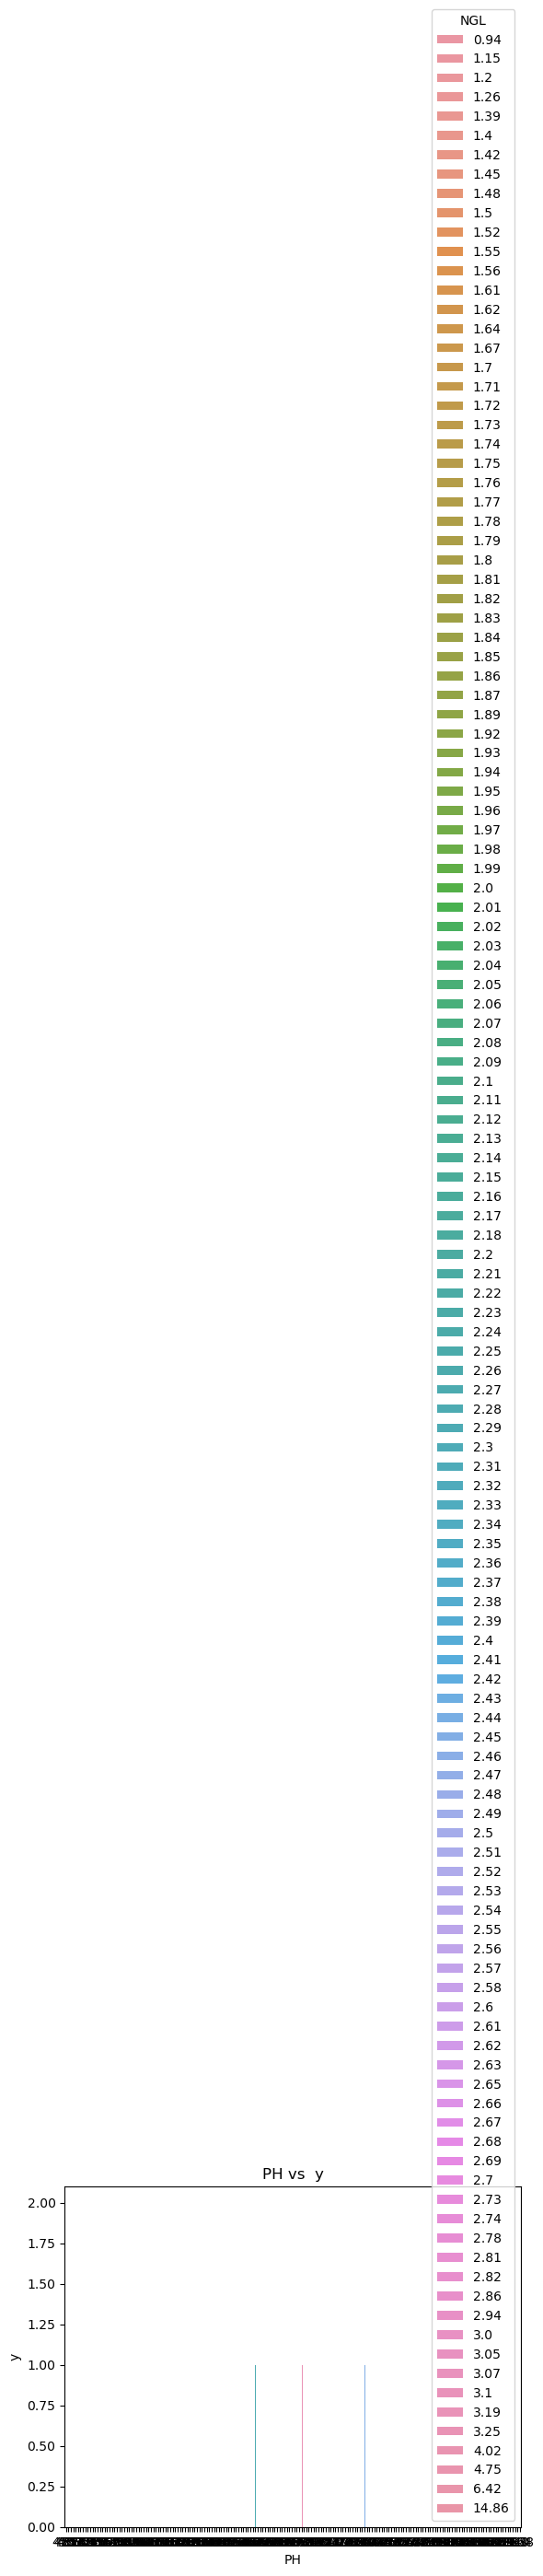

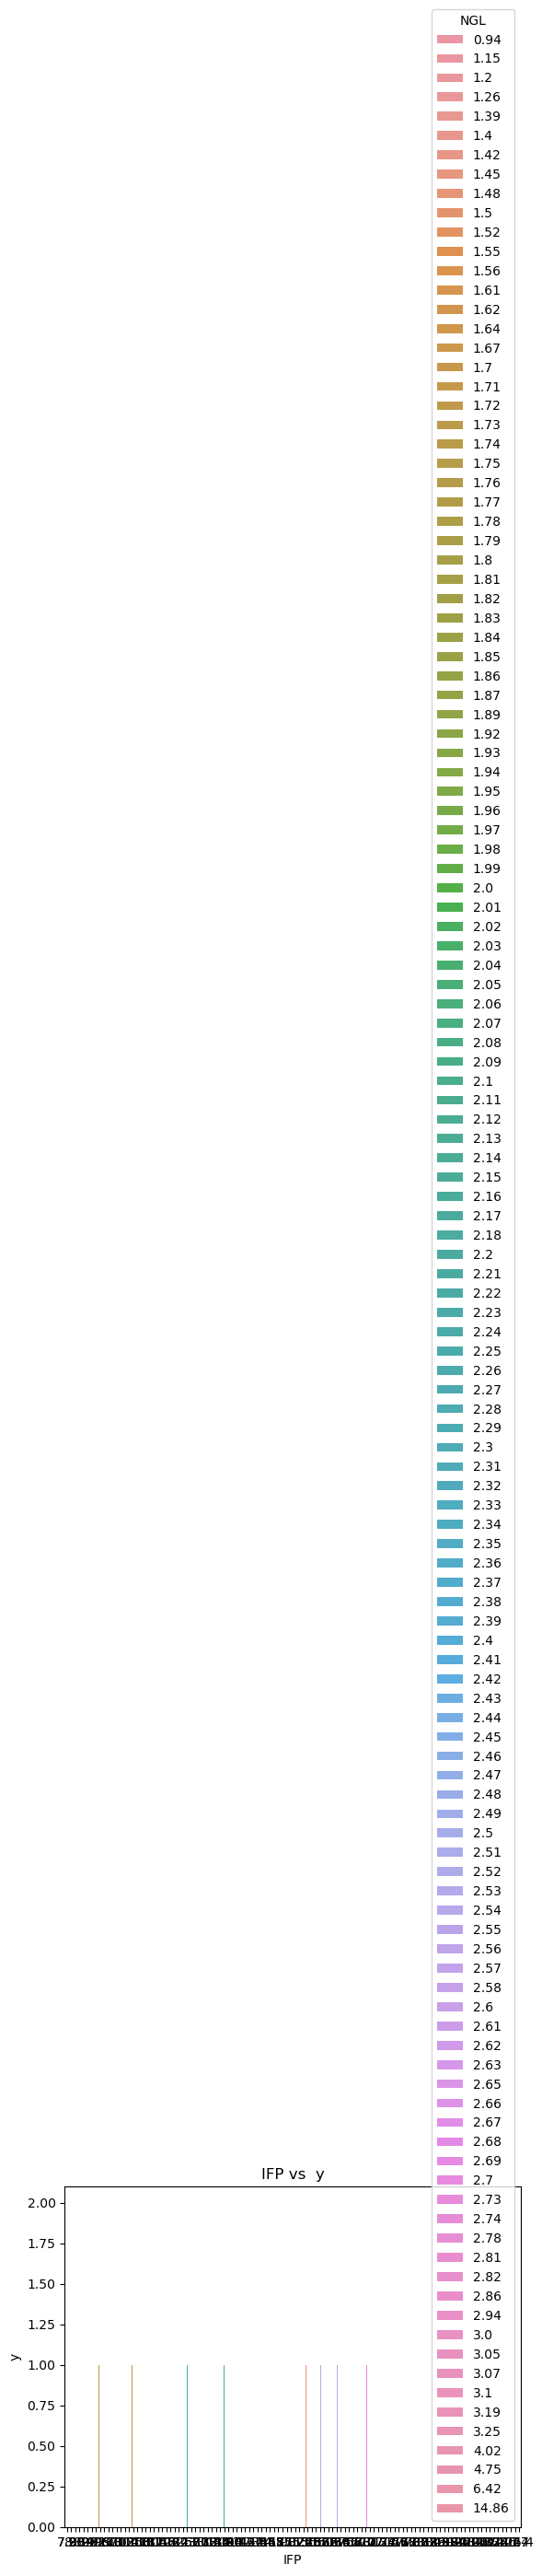

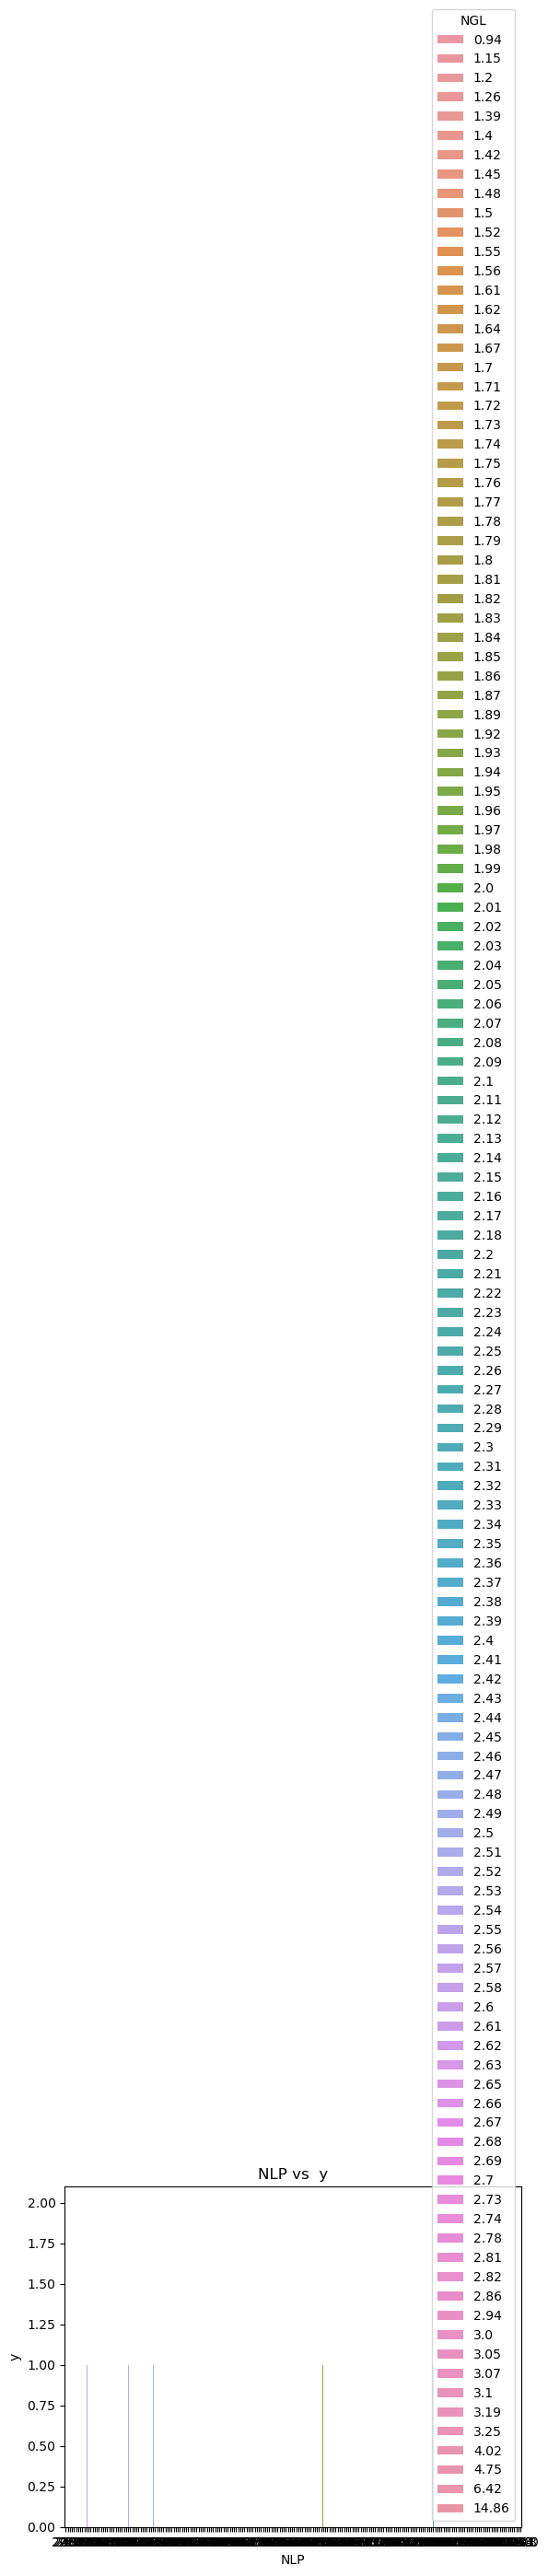

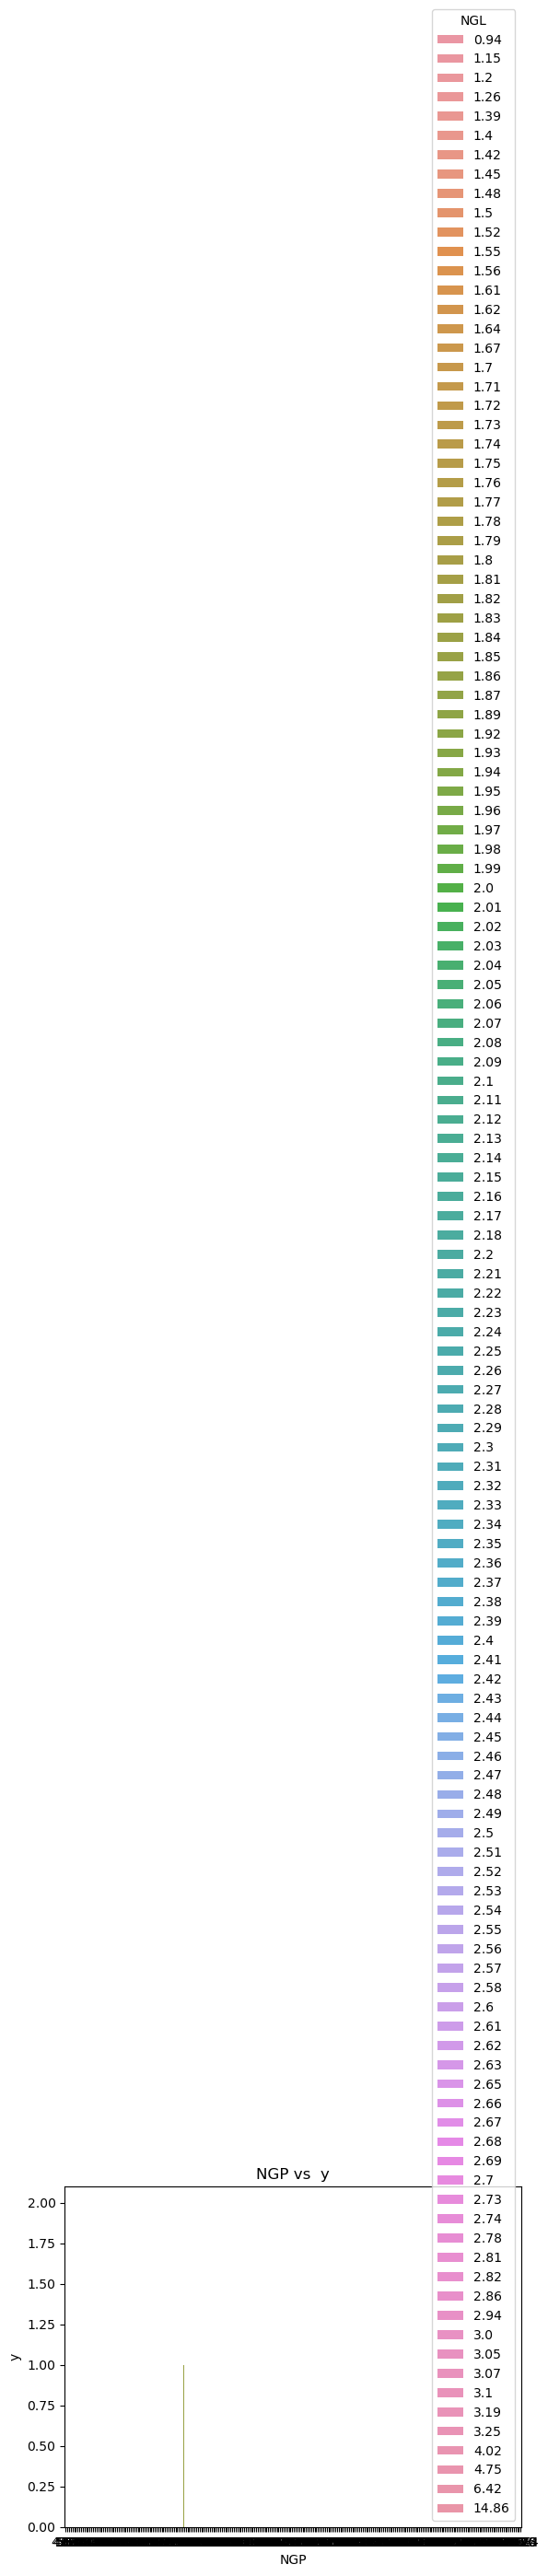

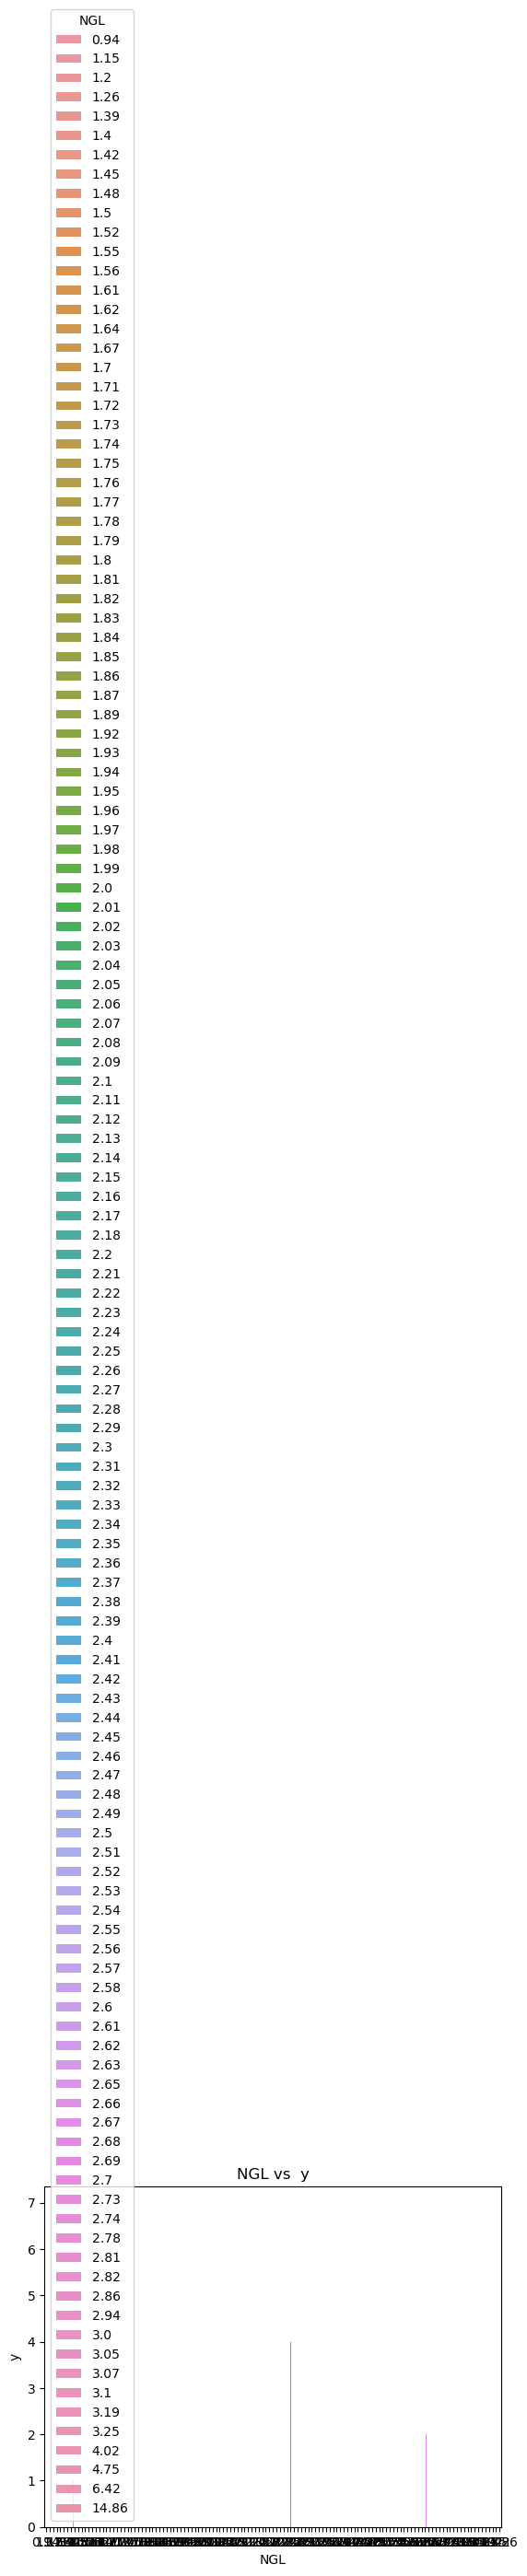

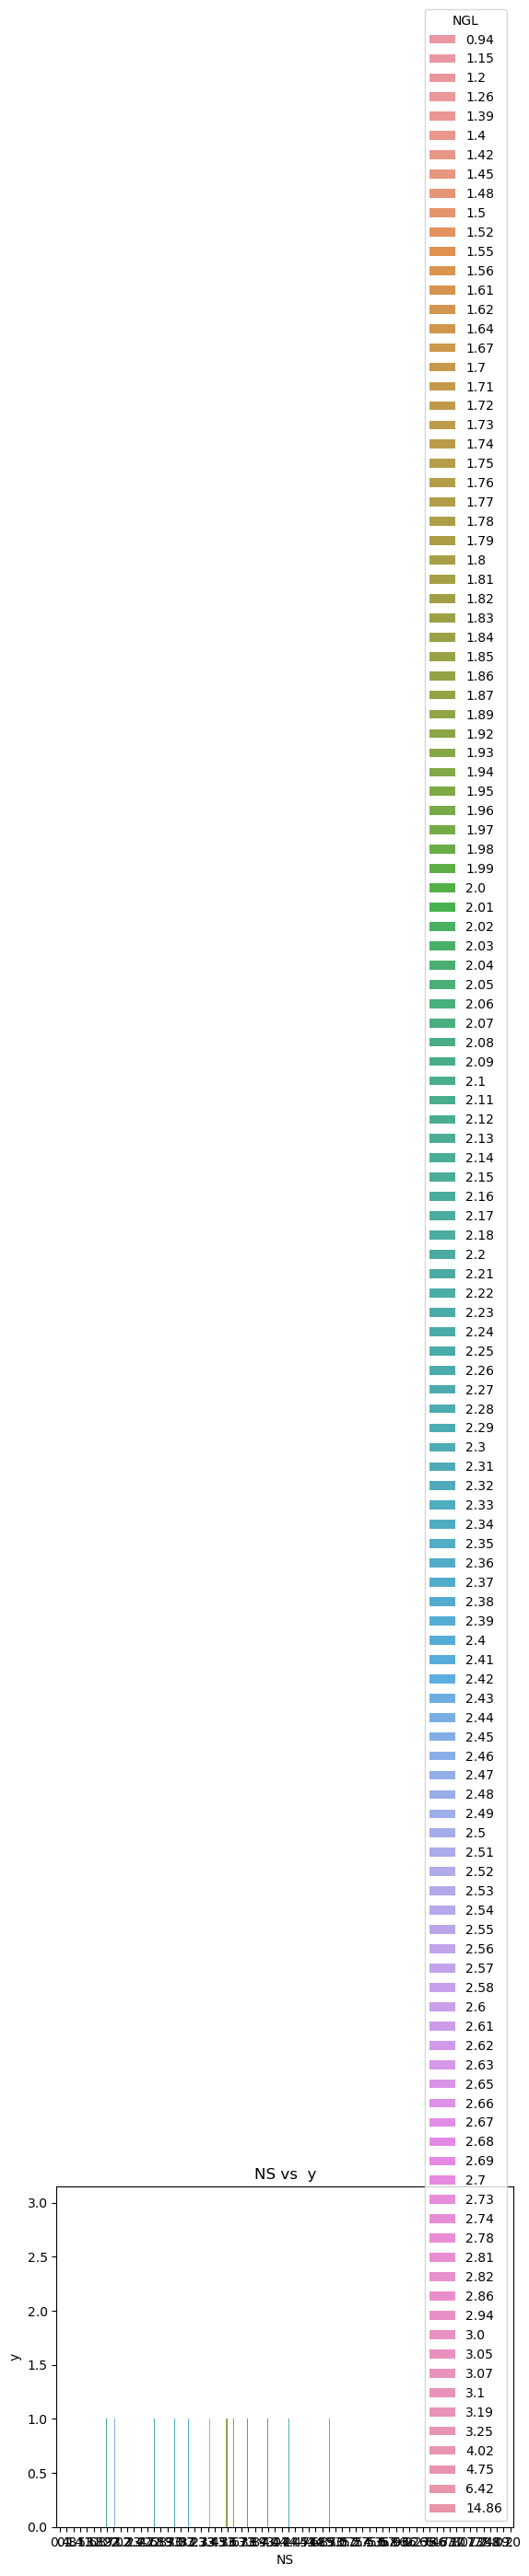

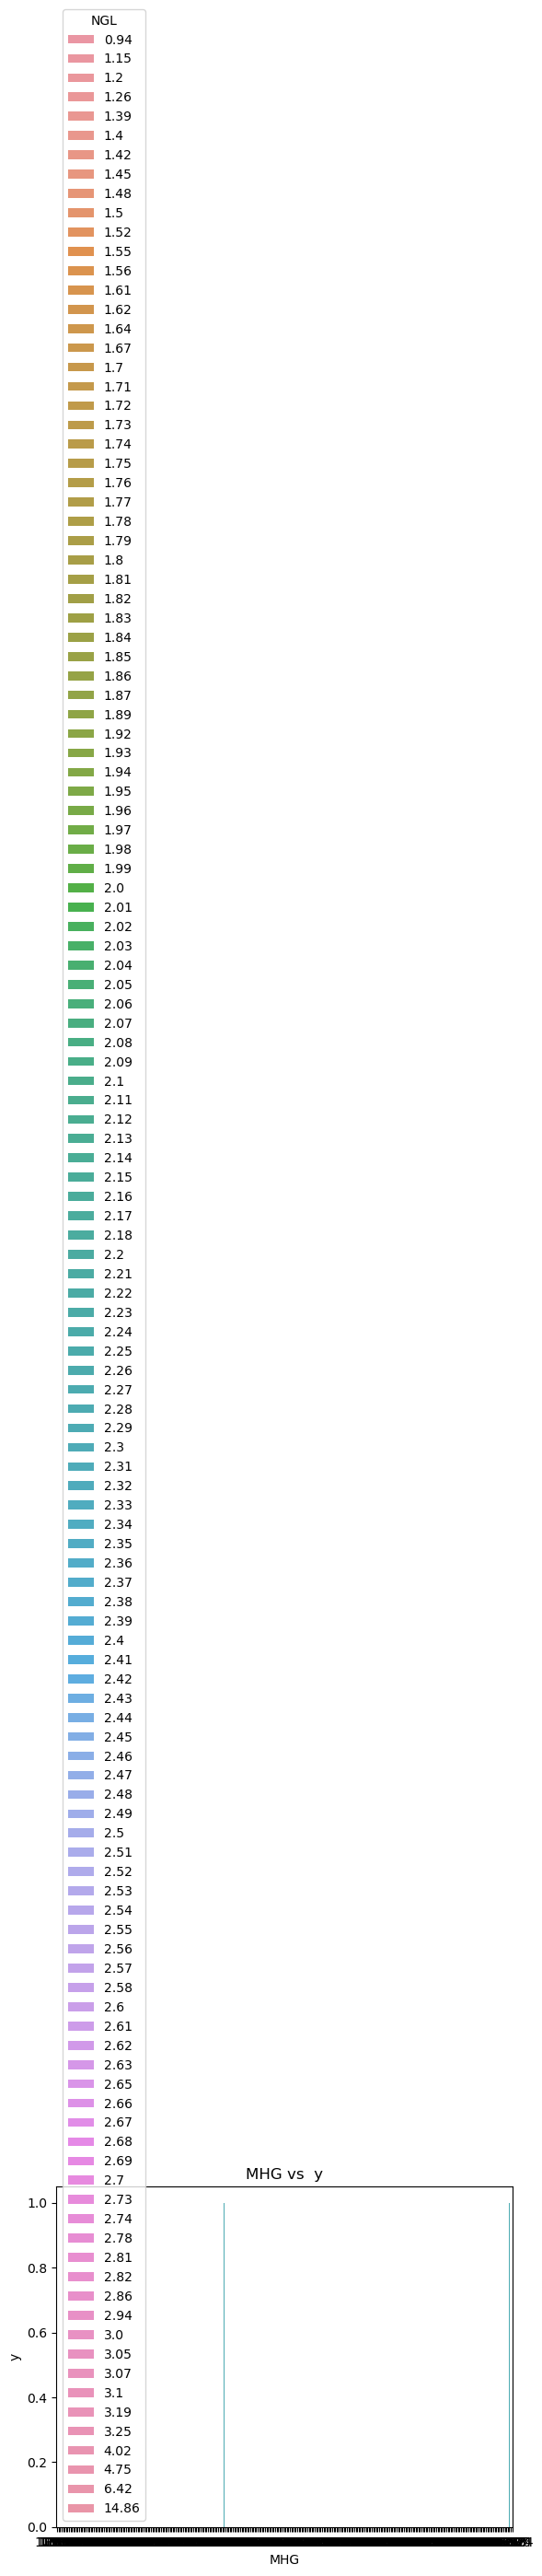

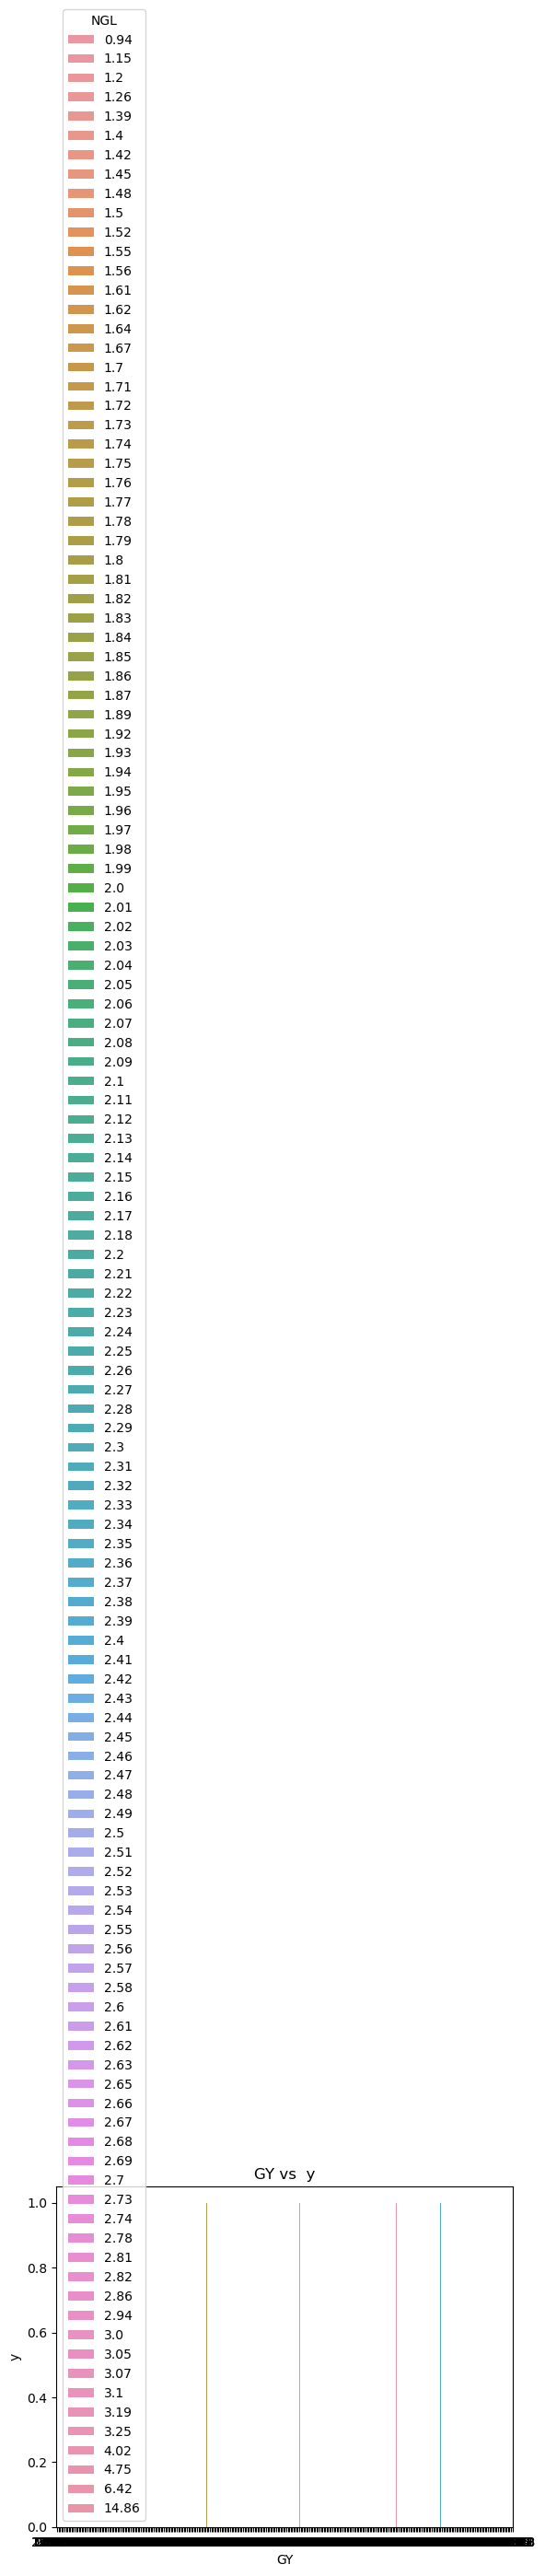

In [11]:
for cat in categories:
    sns.countplot(x=cat,hue="NGL",data=data_eda)
    plt.xlabel(cat)
    plt.ylabel('y')
    plt.title(cat+" vs  NGL")
    #plt.legend(cat+" vs  y")
    plt.show()
    

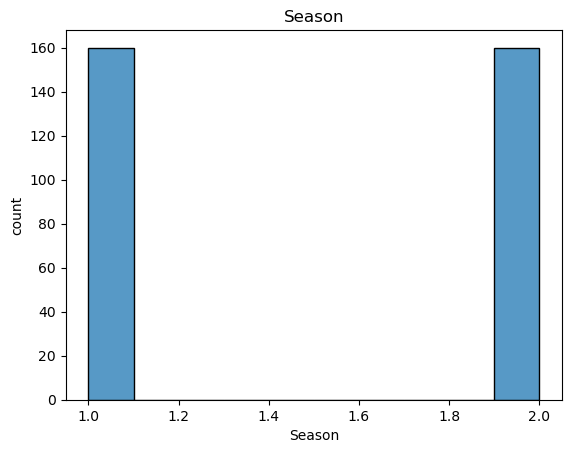

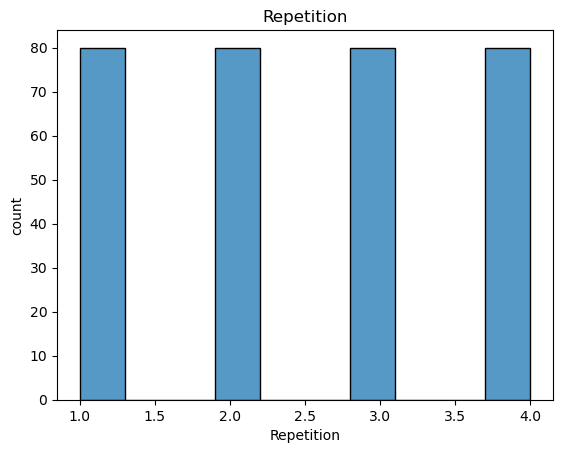

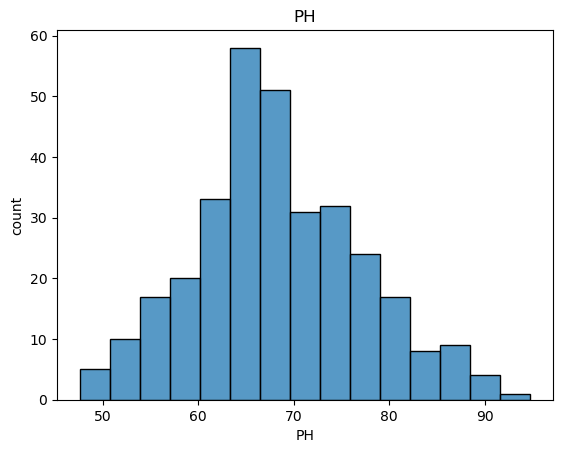

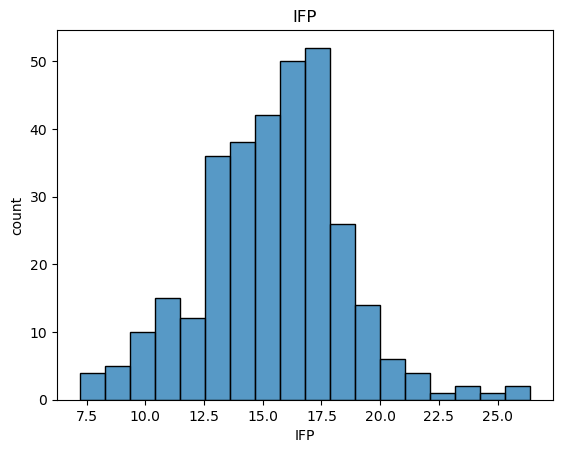

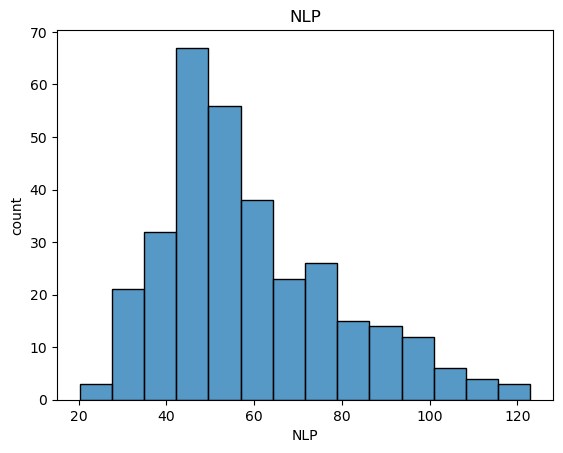

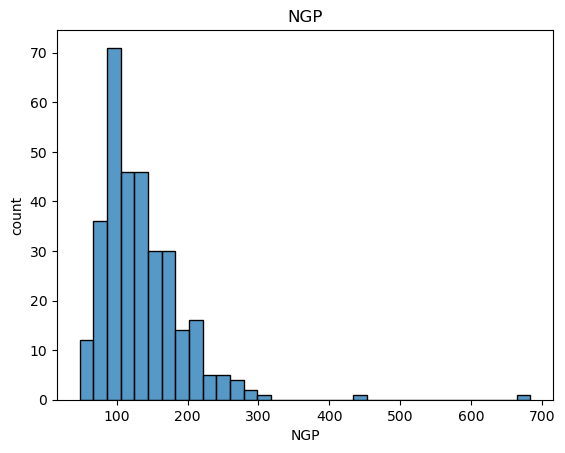

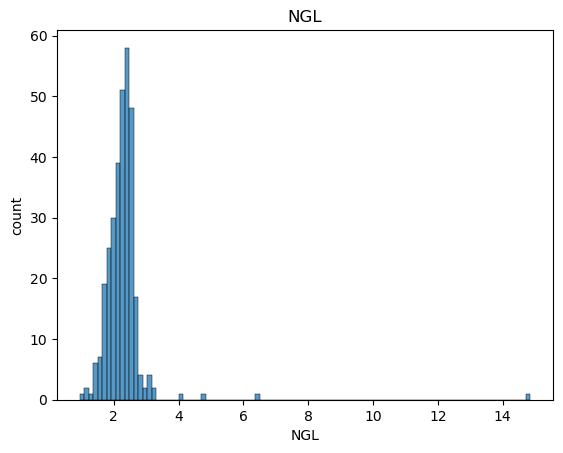

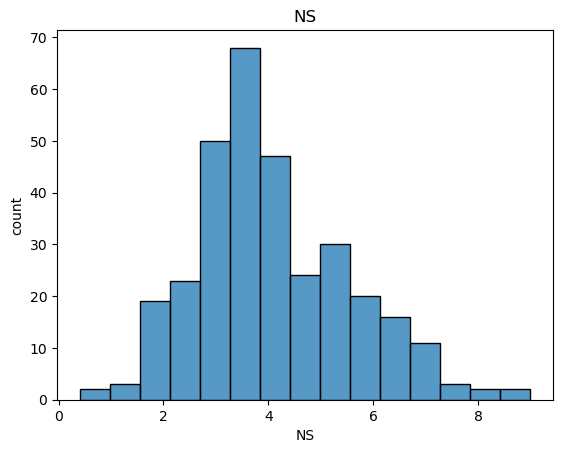

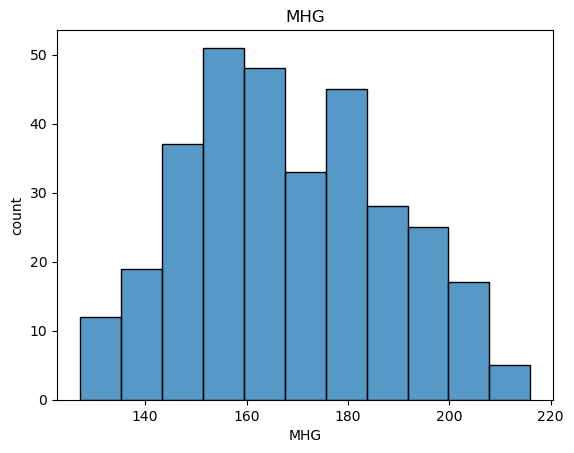

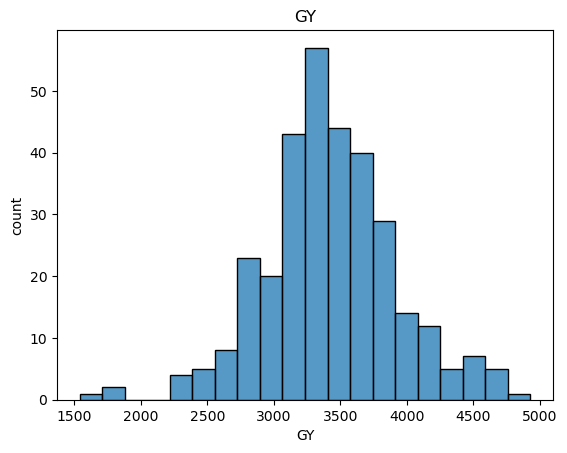

In [14]:
L_num = ['Season', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']

for n in L_num:
    sns.histplot(x=n,data=data_eda)
    plt.xlabel(n)
    plt.ylabel("count")
    plt.title(n)
    plt.show()


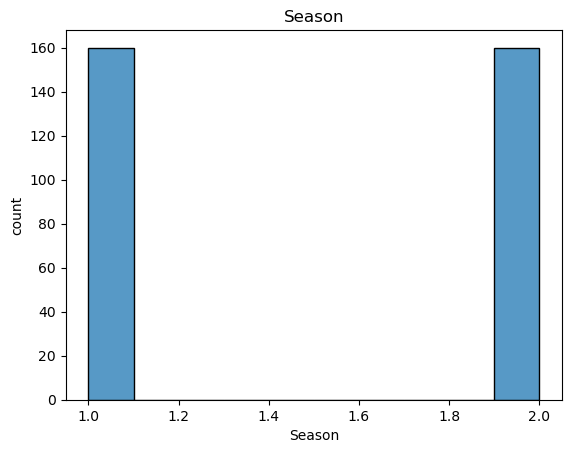

In [13]:
sns.histplot(x='Season',data=data_eda)
plt.xlabel('Season')
plt.ylabel("count")
plt.title('Season')
plt.show()

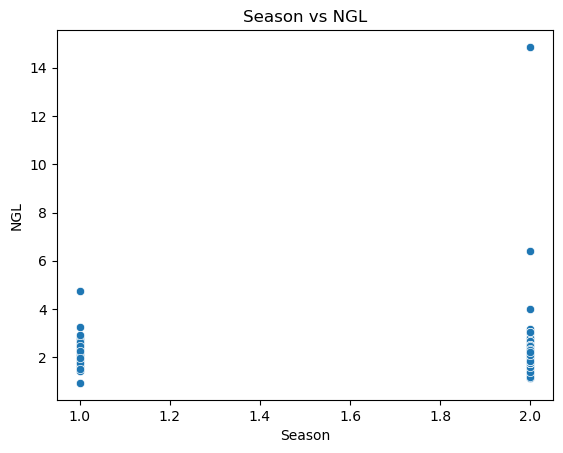

In [18]:
sns.scatterplot(x='Season',y='NGL' ,data=data_eda)
plt.xlabel("Season")
plt.ylabel("NGL")
plt.title("Season vs NGL")
plt.show()

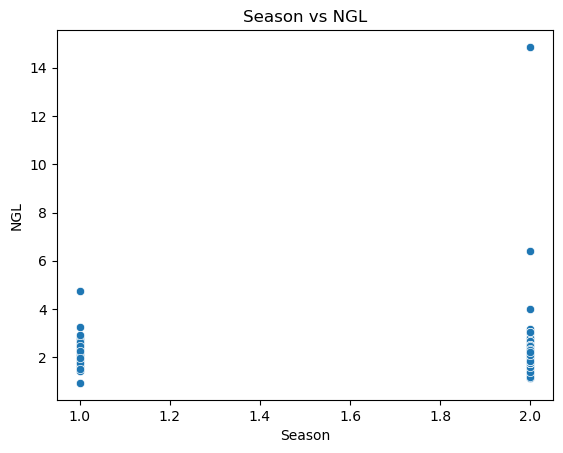

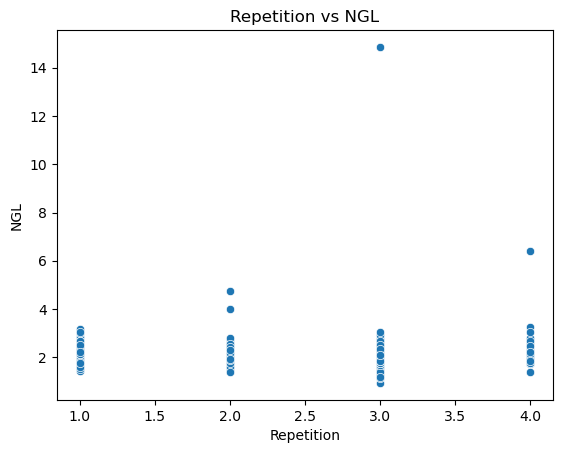

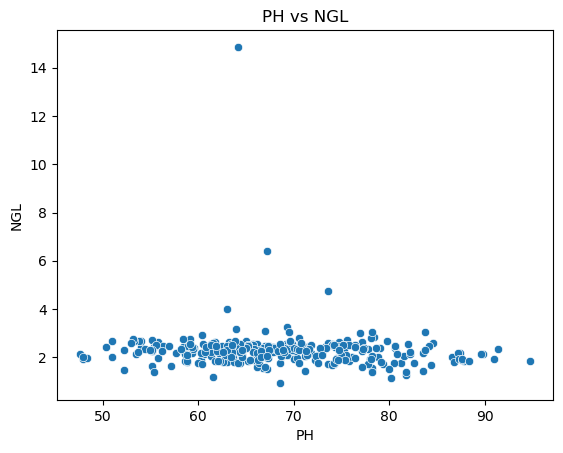

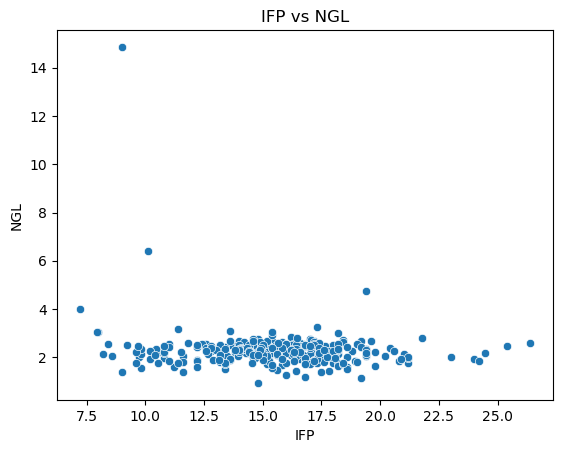

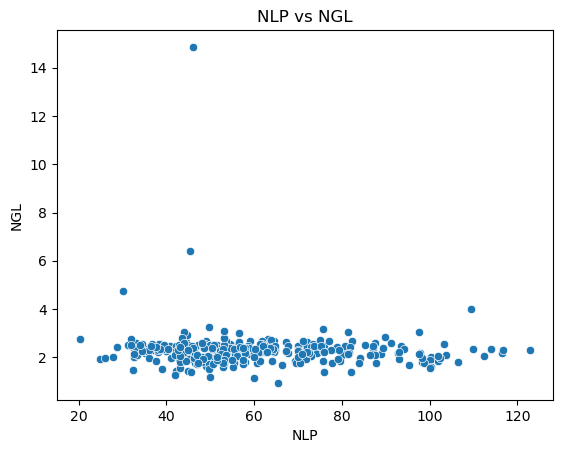

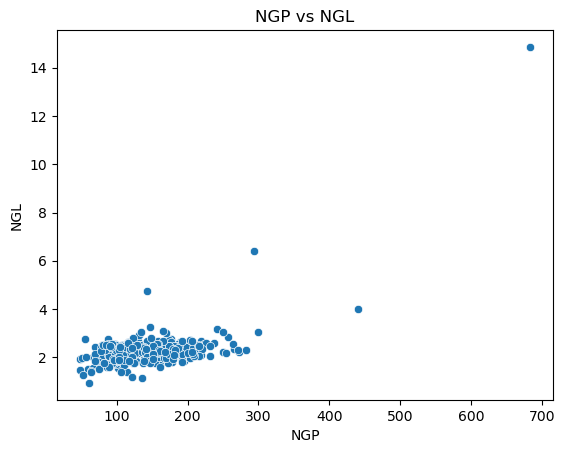

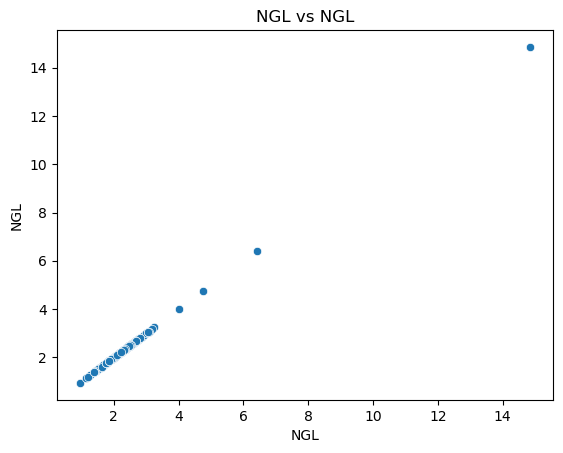

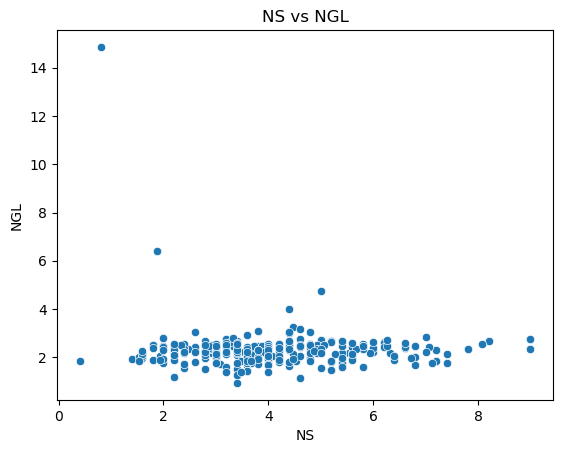

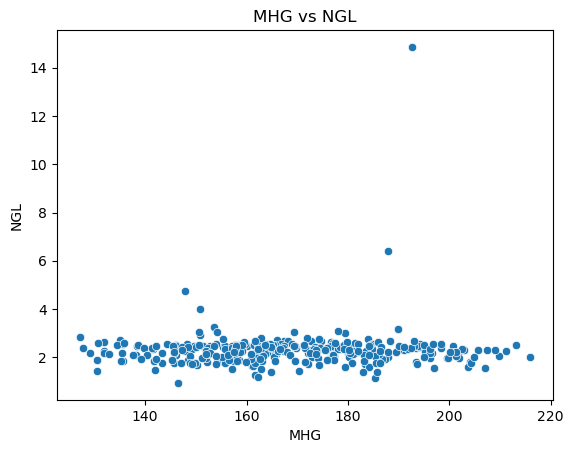

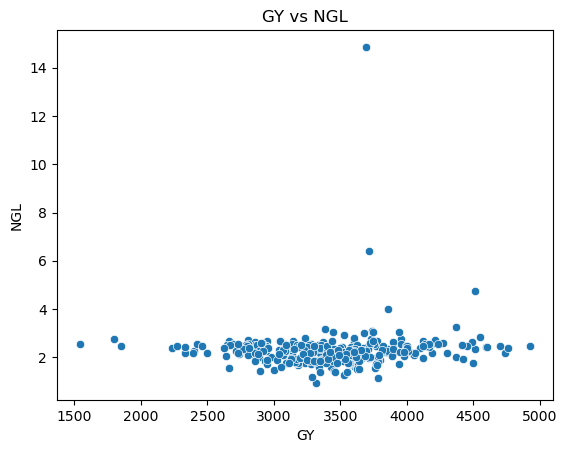

In [20]:
for item in L_num:
    sns.scatterplot(x= item ,y='NGL' ,data=data_eda)
    plt.xlabel(item)
    plt.ylabel("NGL")
    plt.title(item+" vs NGL")
    plt.show()

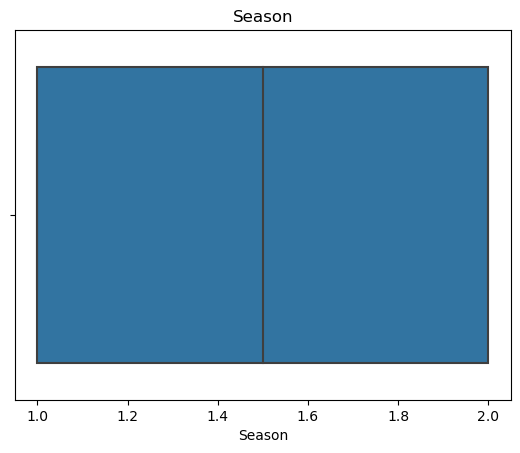

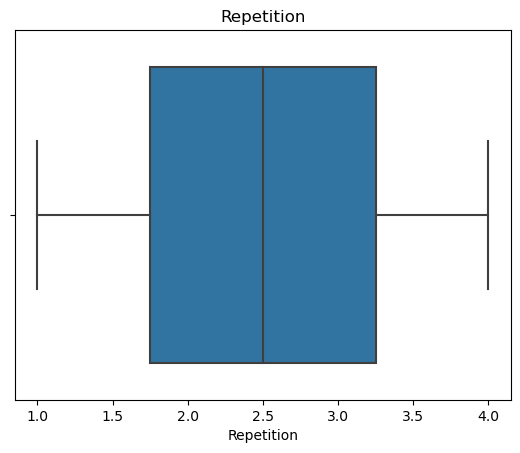

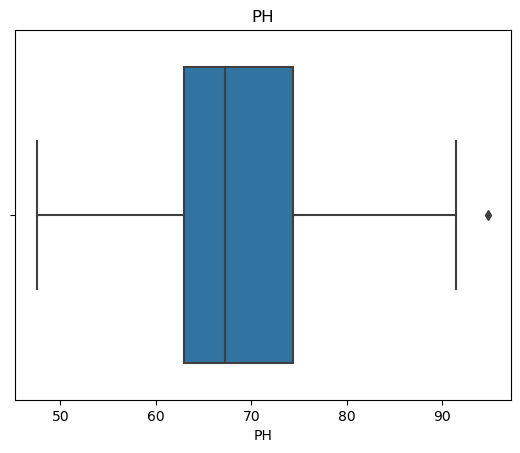

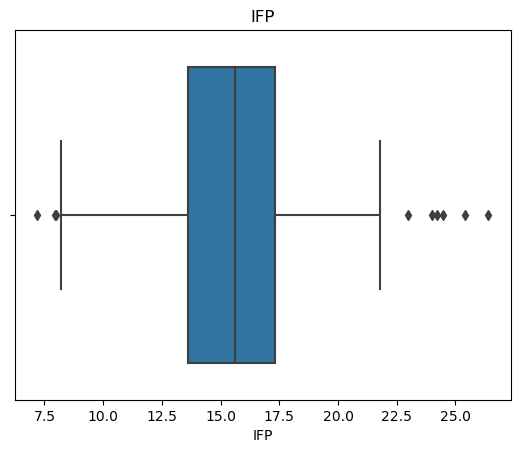

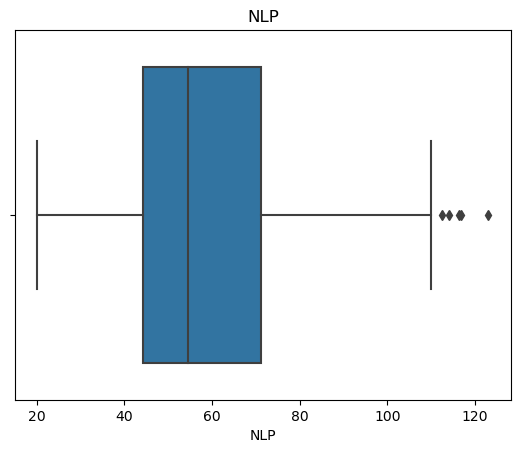

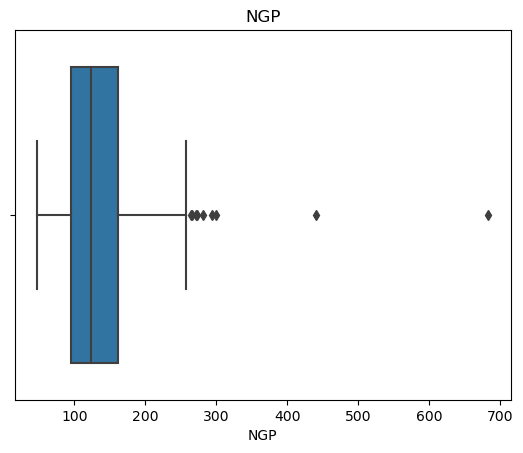

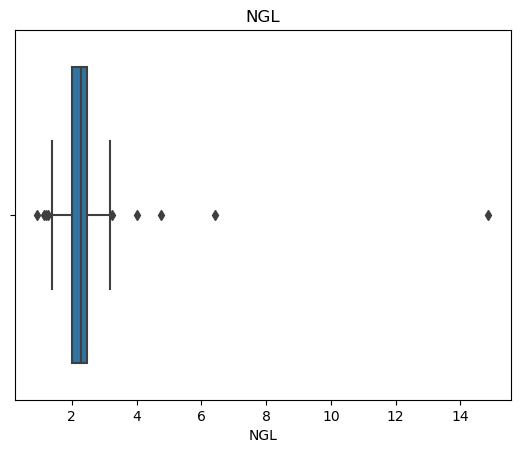

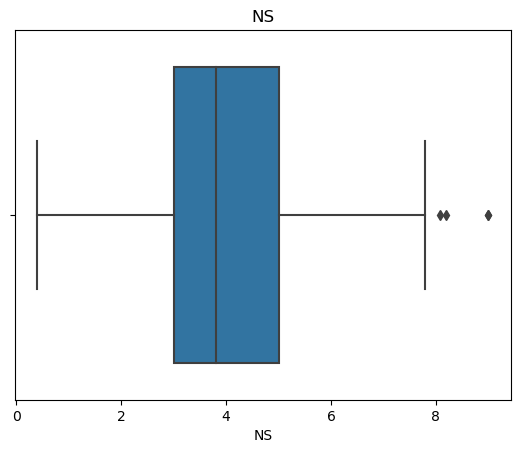

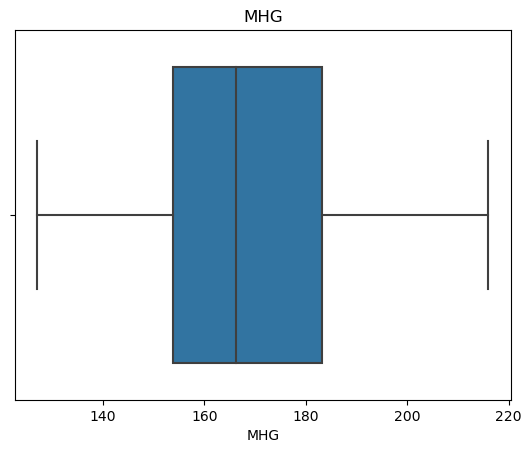

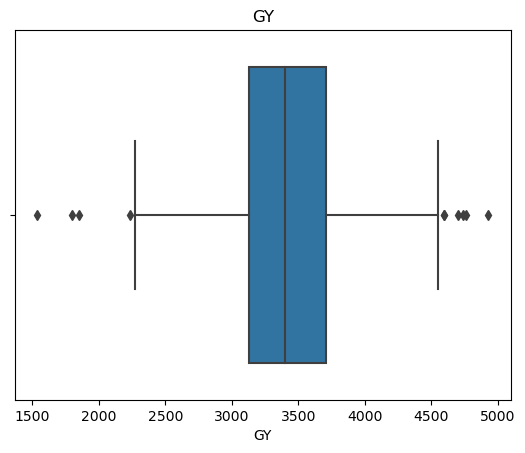

In [21]:

for c in L_num:
    sns.boxplot(x=c,data=data_eda)
    plt.xlabel(c)
    plt.title(c)
    plt.show()
    

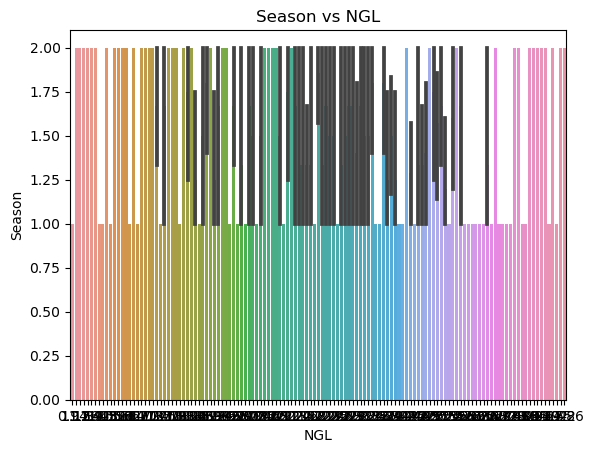

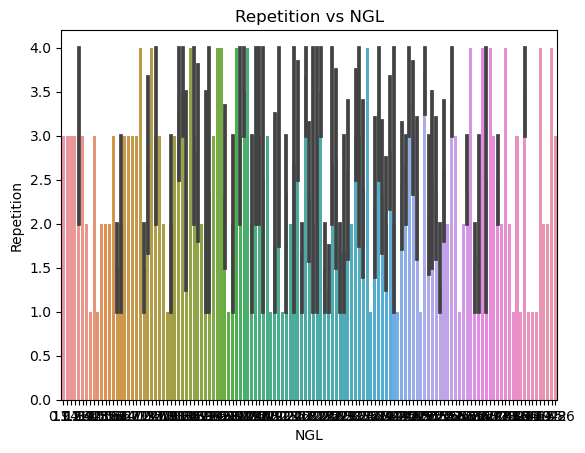

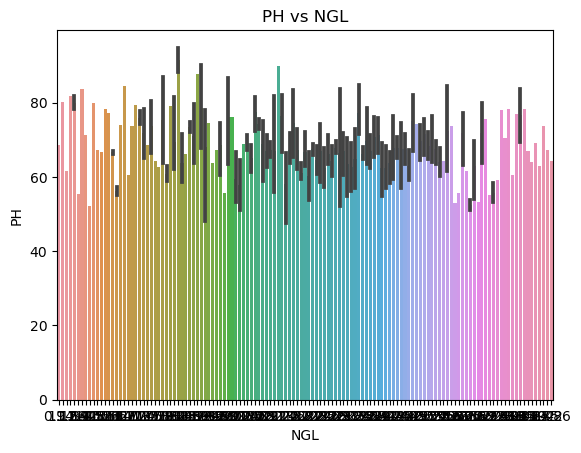

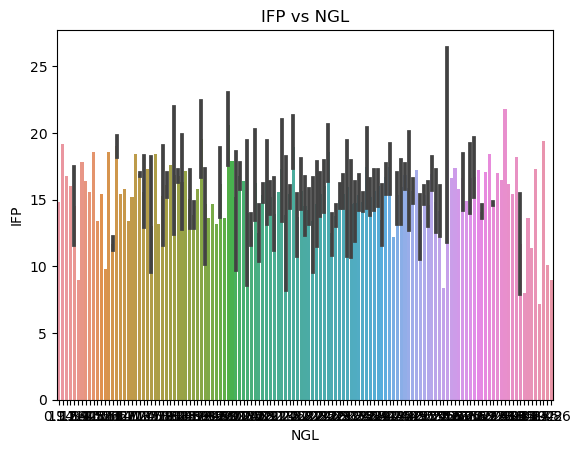

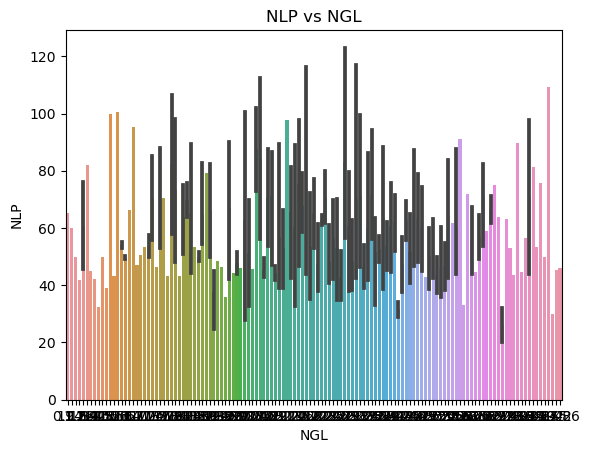

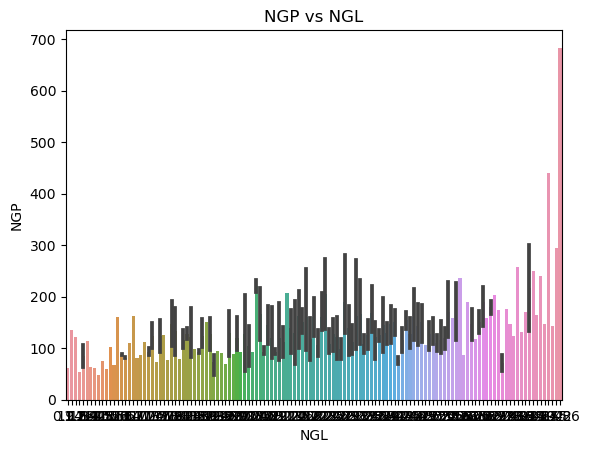

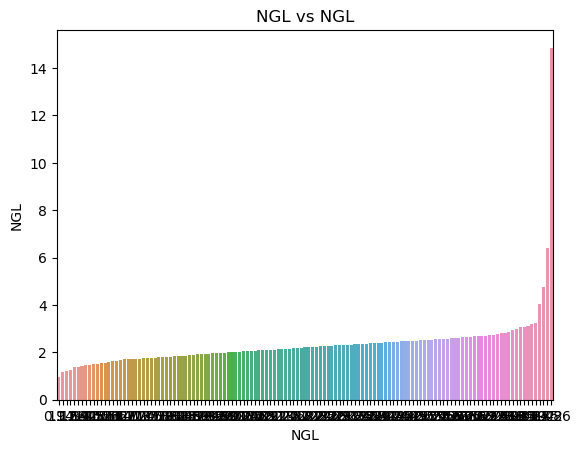

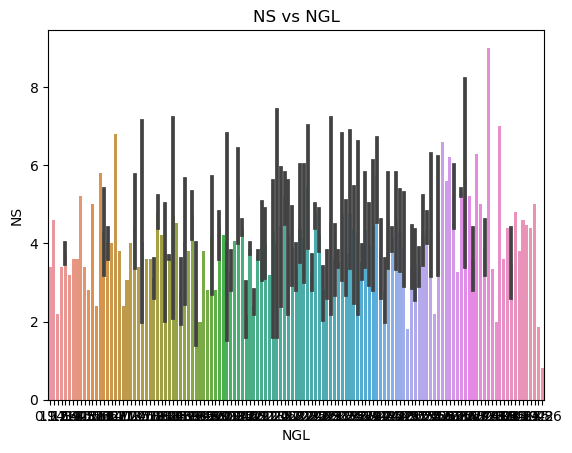

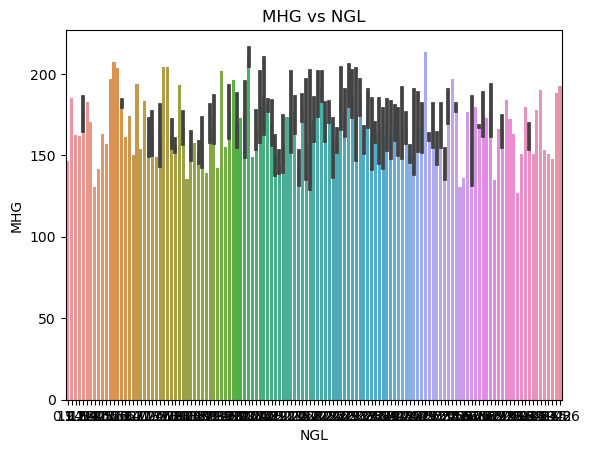

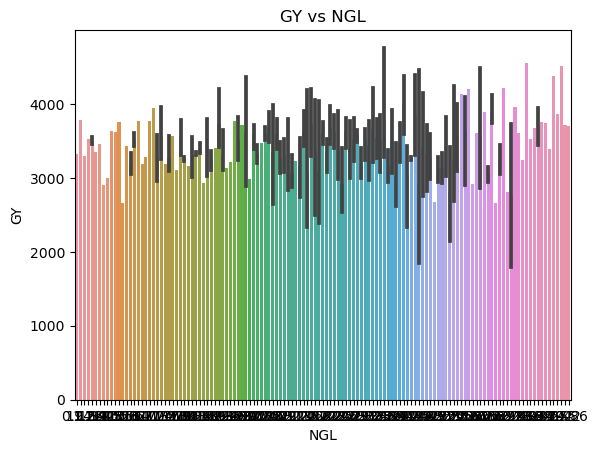

In [23]:
for c in L_num :
    
    sns.barplot(x='NGL',y=c,data=data_eda)
    plt.xlabel("NGL")
    plt.ylabel(c)
    plt.title(c+" vs NGL")
    plt.show()

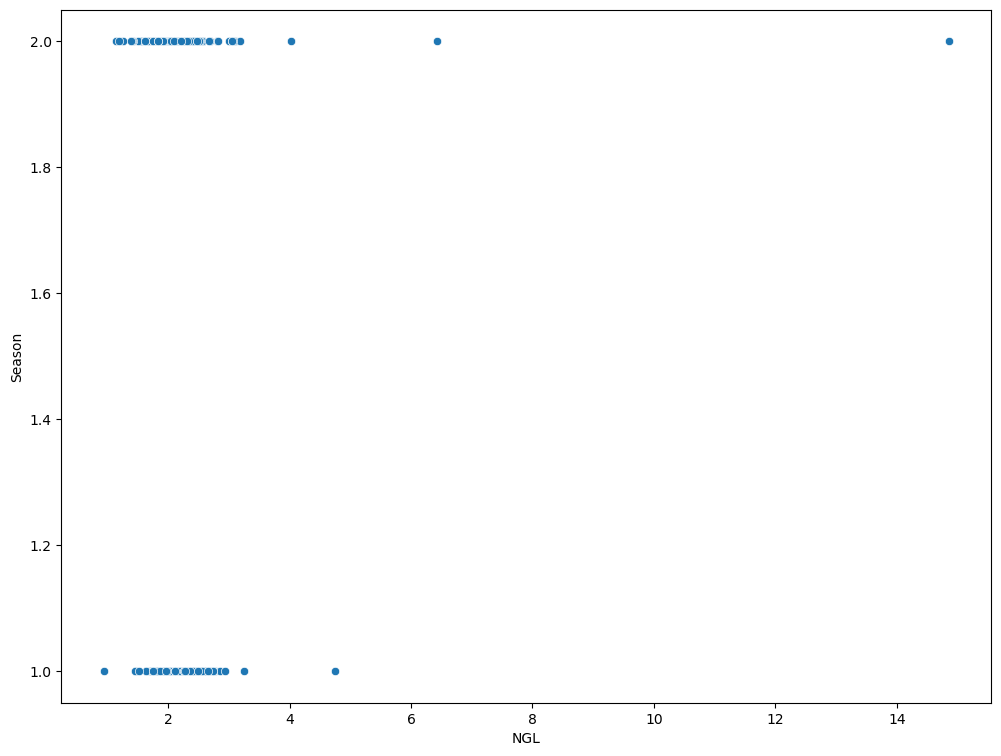

In [24]:
plt.subplots(figsize=(12,9))
sns.scatterplot(y='Season' ,x='NGL',data=data_eda)
plt.show()

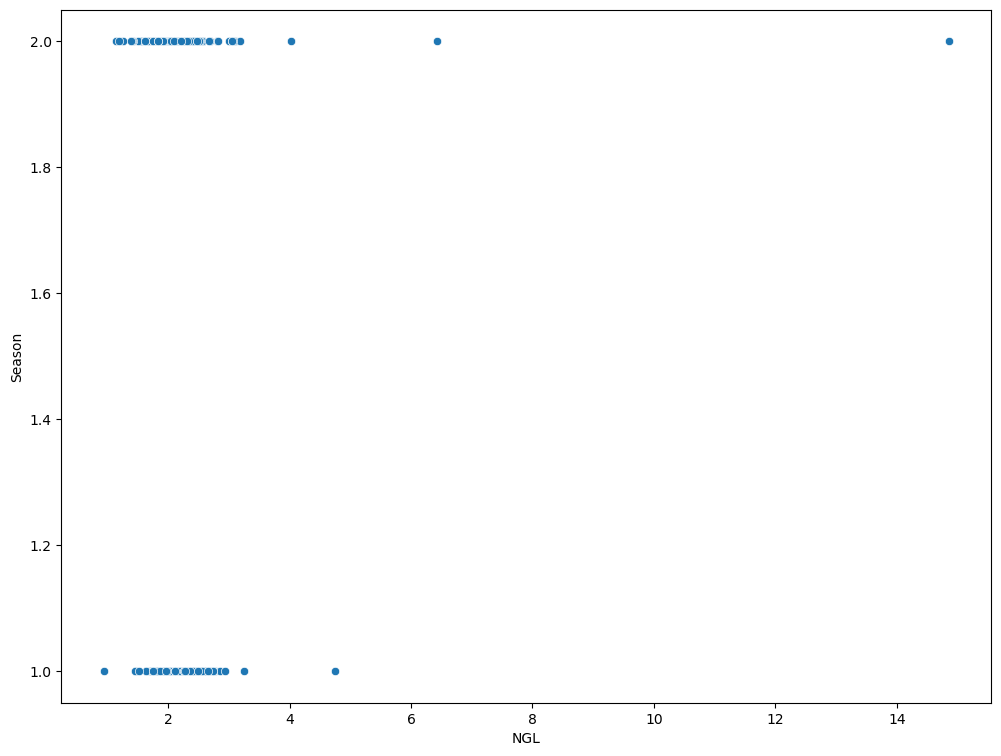

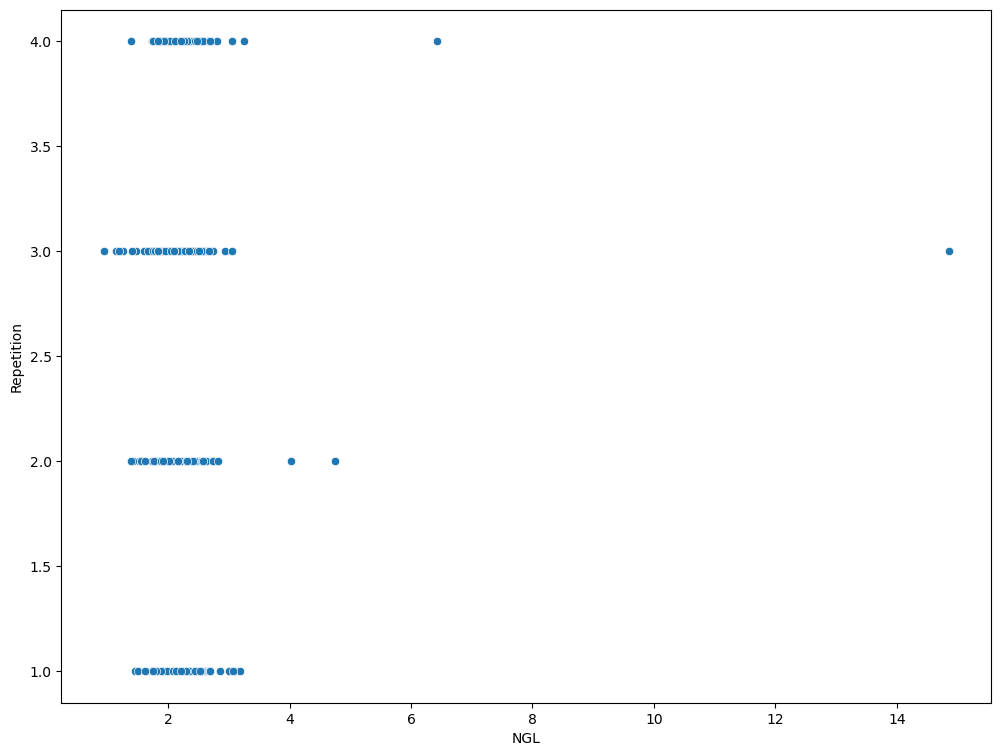

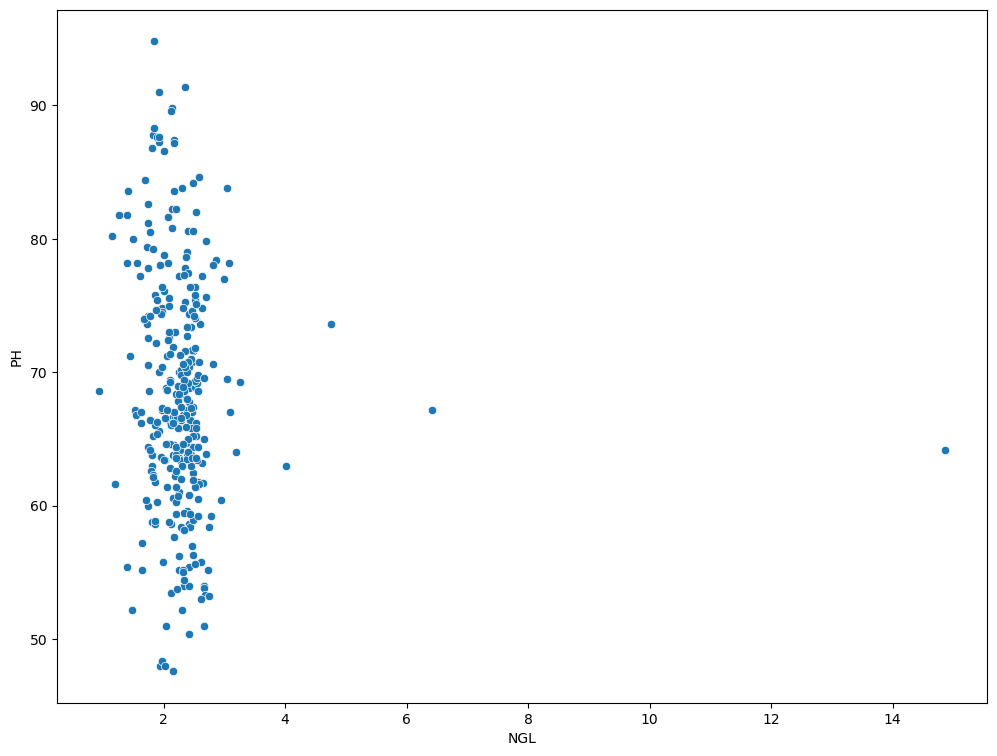

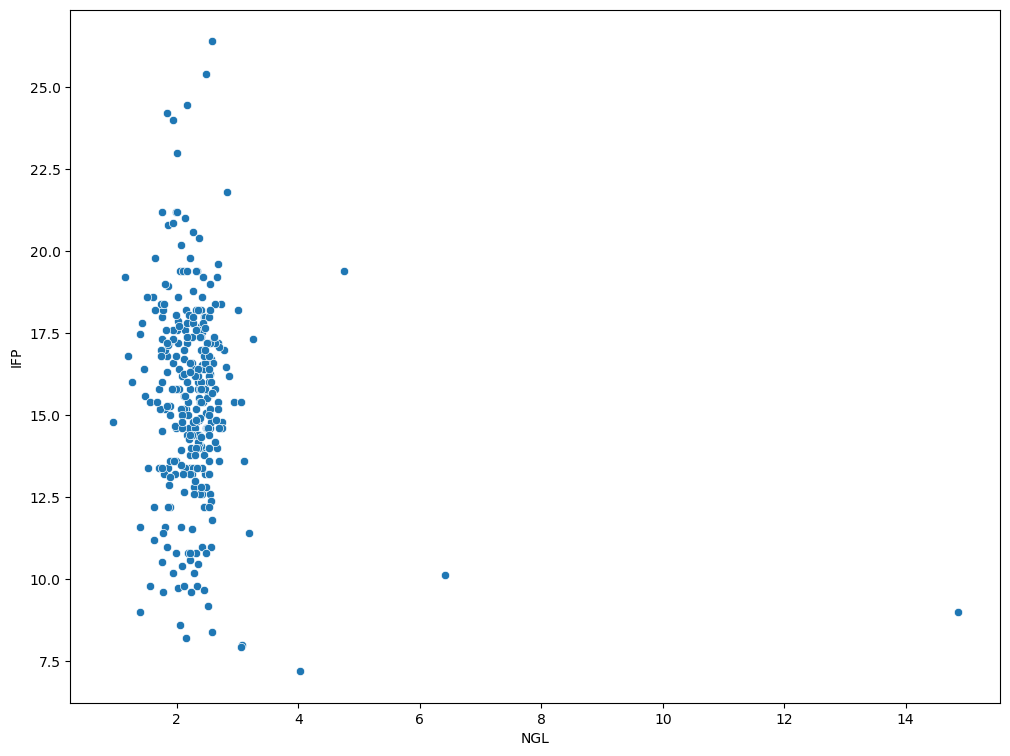

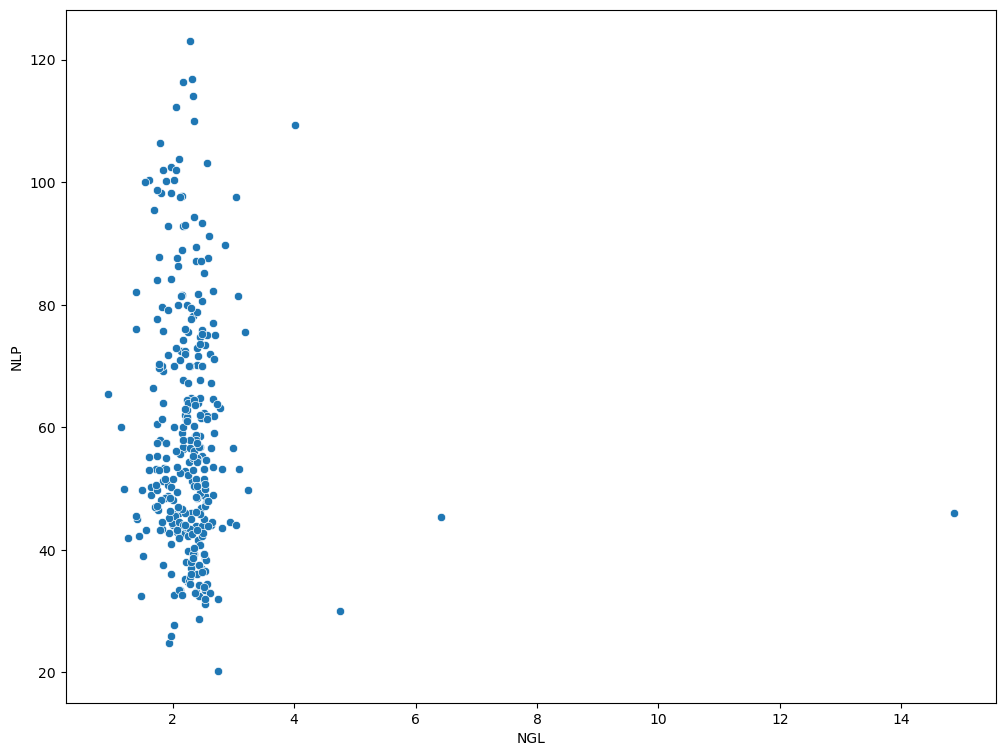

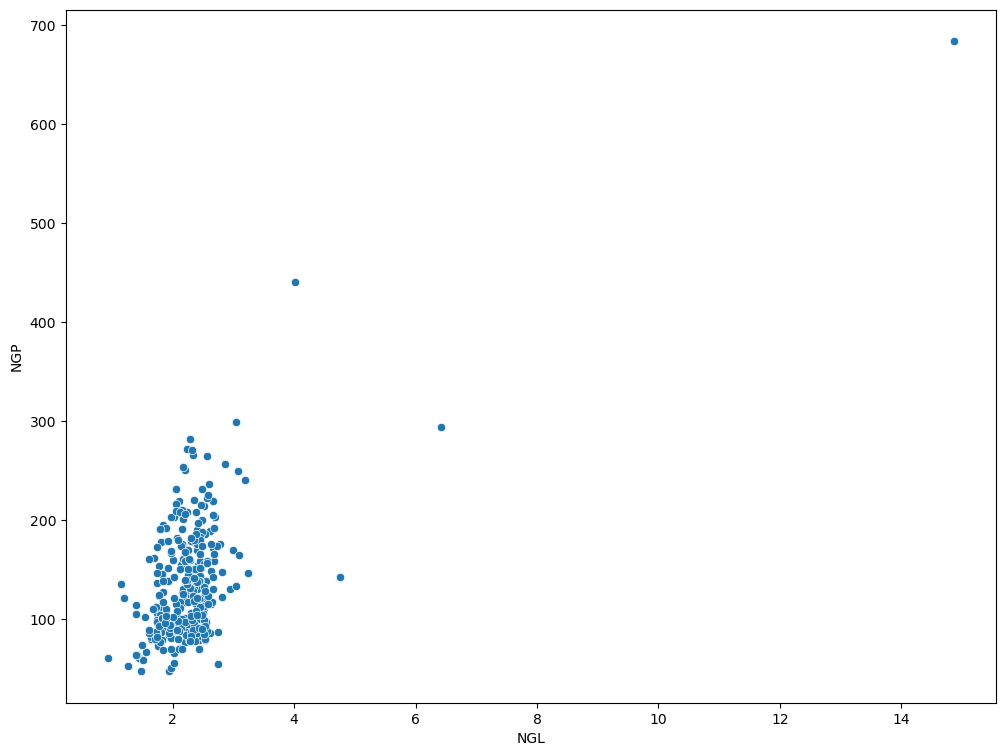

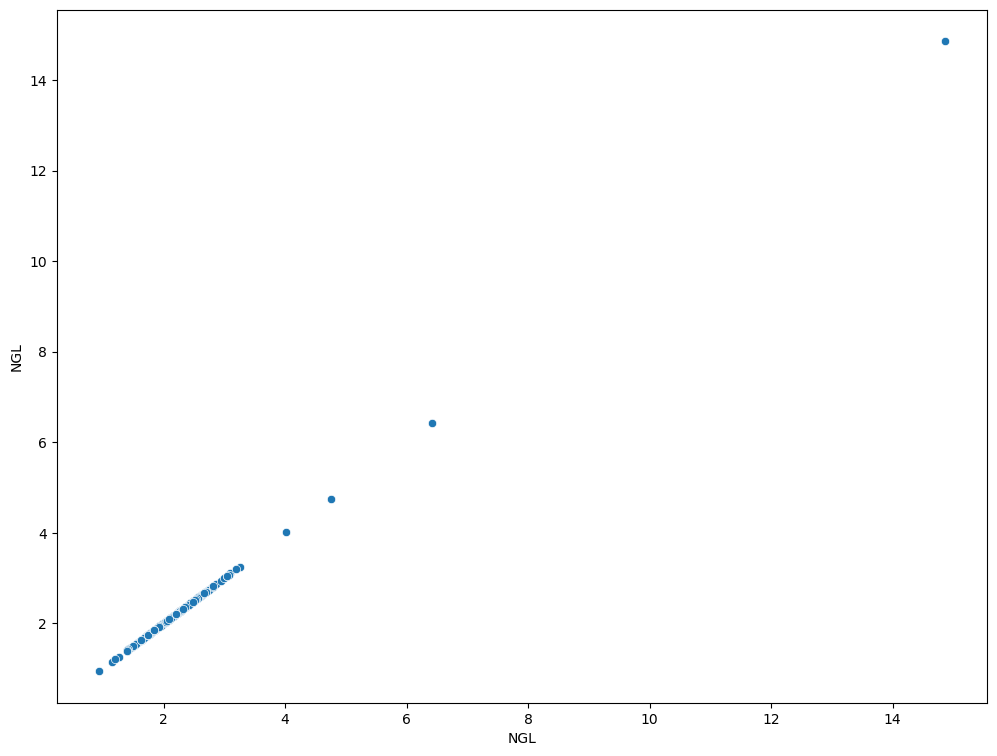

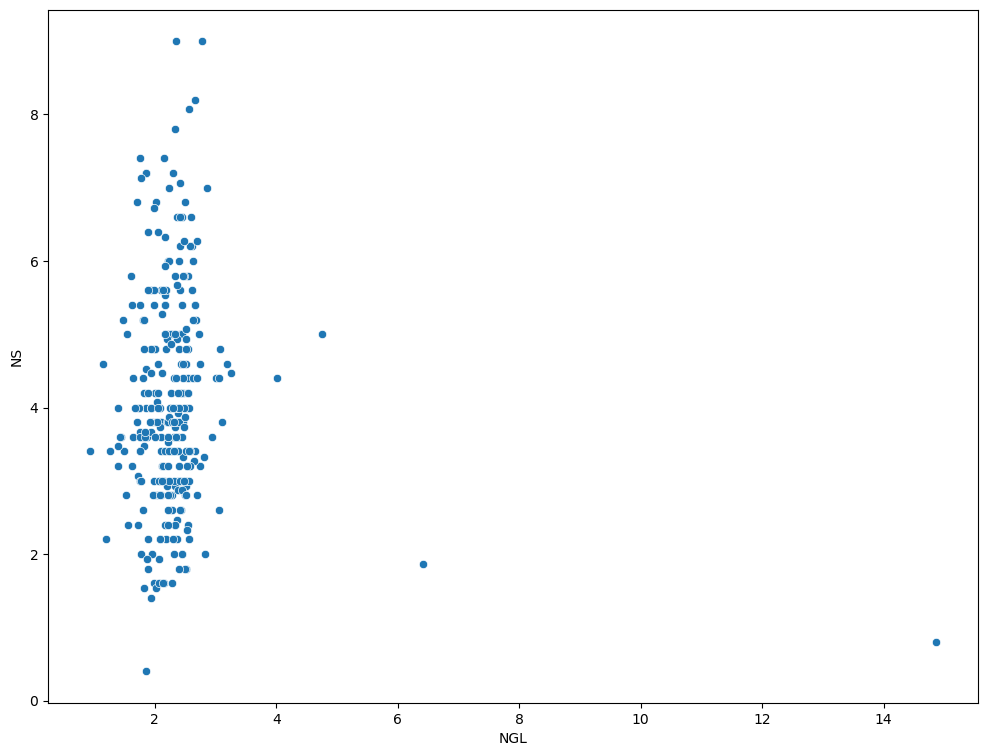

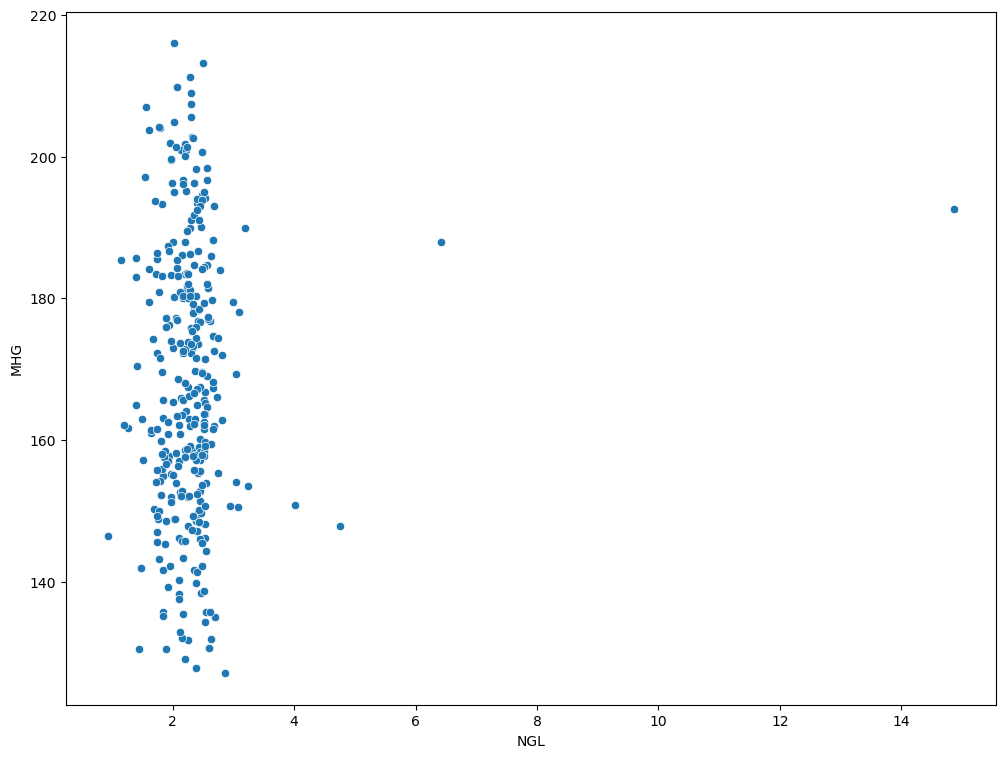

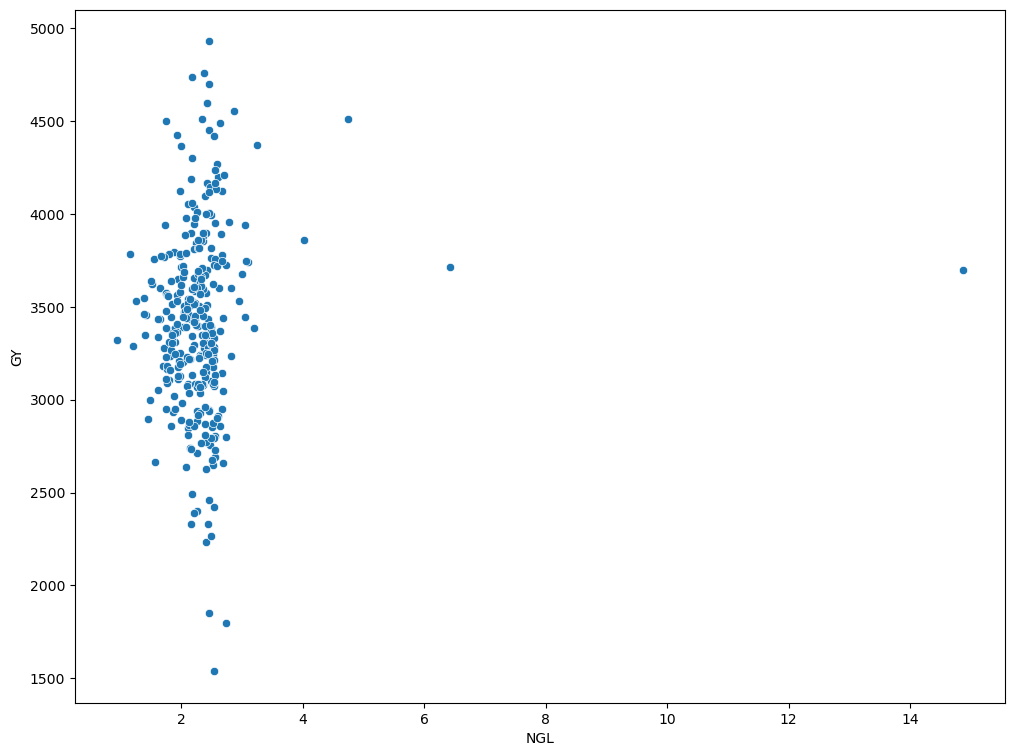

In [25]:
for item in L_num:
    plt.subplots(figsize=(12,9))
    sns.scatterplot(y=item ,x='NGL',data=data_eda)
    plt.show()

# Distriution

Age mean :  1.5
Age median :  1.5


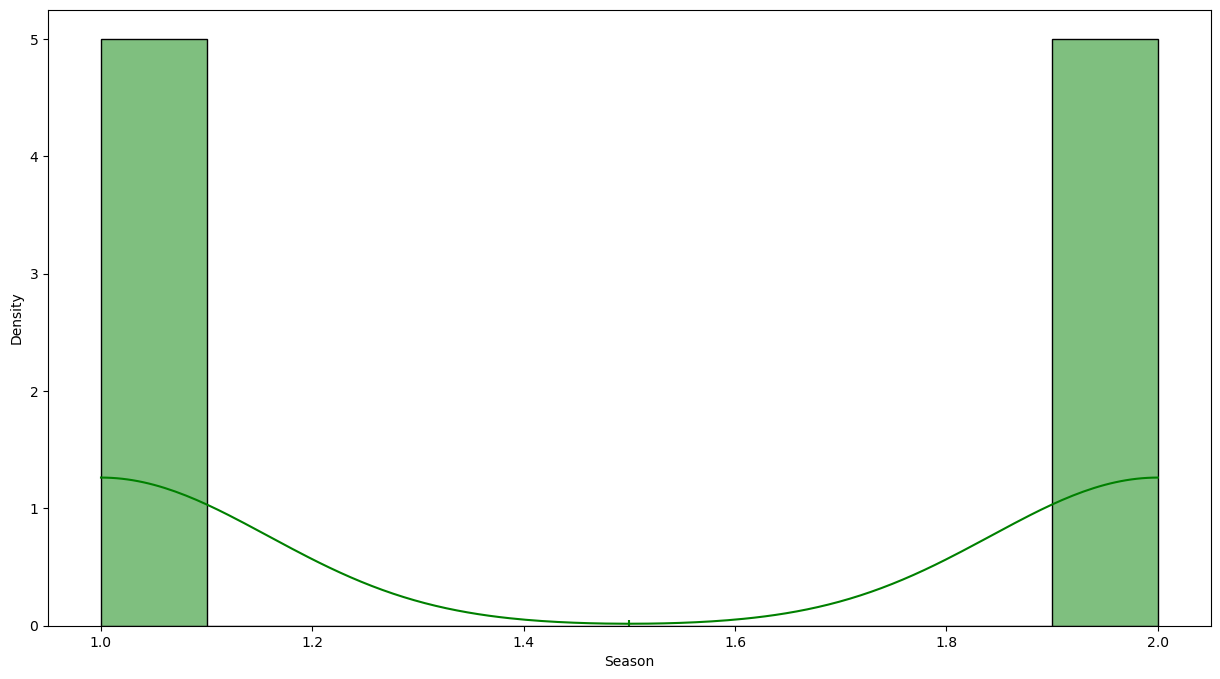

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(data_eda['Season'], color = 'green', stat="density", kde=True,)
age_mean = data_eda['Season'].mean()
plt.vlines(age_mean, 0, 0.05, color = 'green')

print('Age mean : ', age_mean)
print('Age median : ', data_eda['Season'].median())

Season mean :  1.5
Season median :  1.5
Repetition mean :  2.5
Repetition median :  2.5
PH mean :  68.38678124999998
PH median :  67.2
IFP mean :  15.465000000000003
IFP median :  15.6
NLP mean :  59.08831250000001
NLP median :  54.5
NGP mean :  135.08584375
NGP median :  123.0
NGL mean :  2.29084375
NGL median :  2.28
NS mean :  4.07165625
NS median :  3.8
MHG mean :  168.3223125
MHG median :  166.15
GY mean :  3418.5537941749994
GY median :  3397.276724


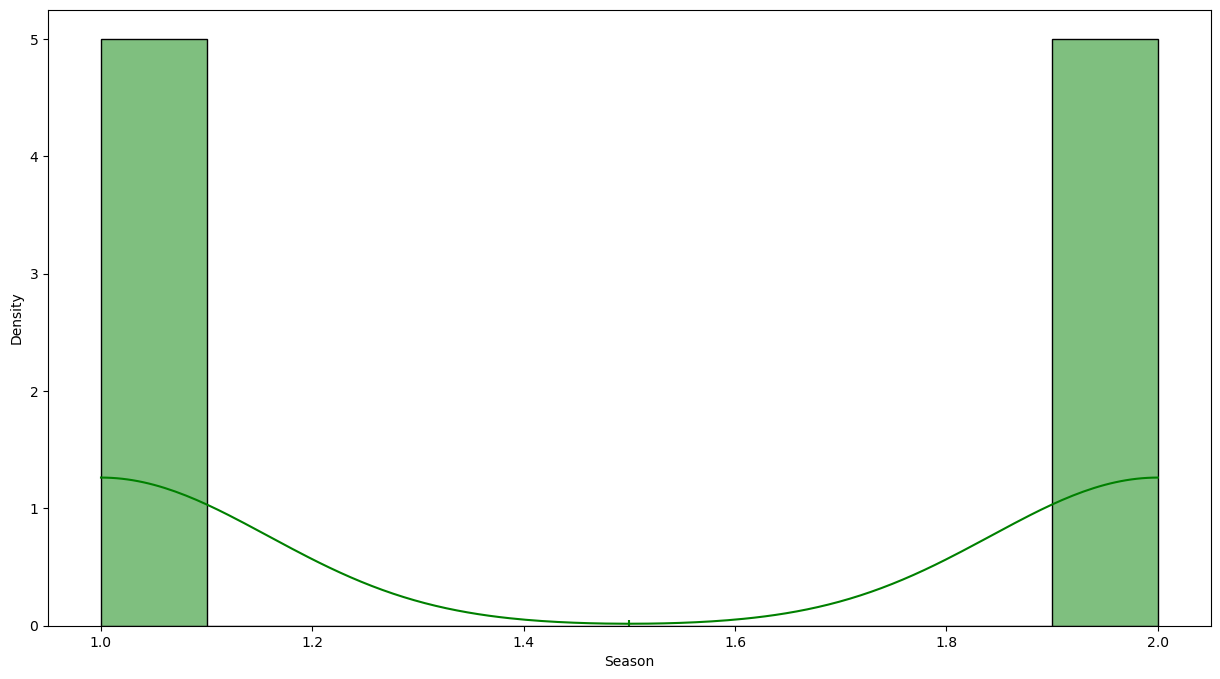

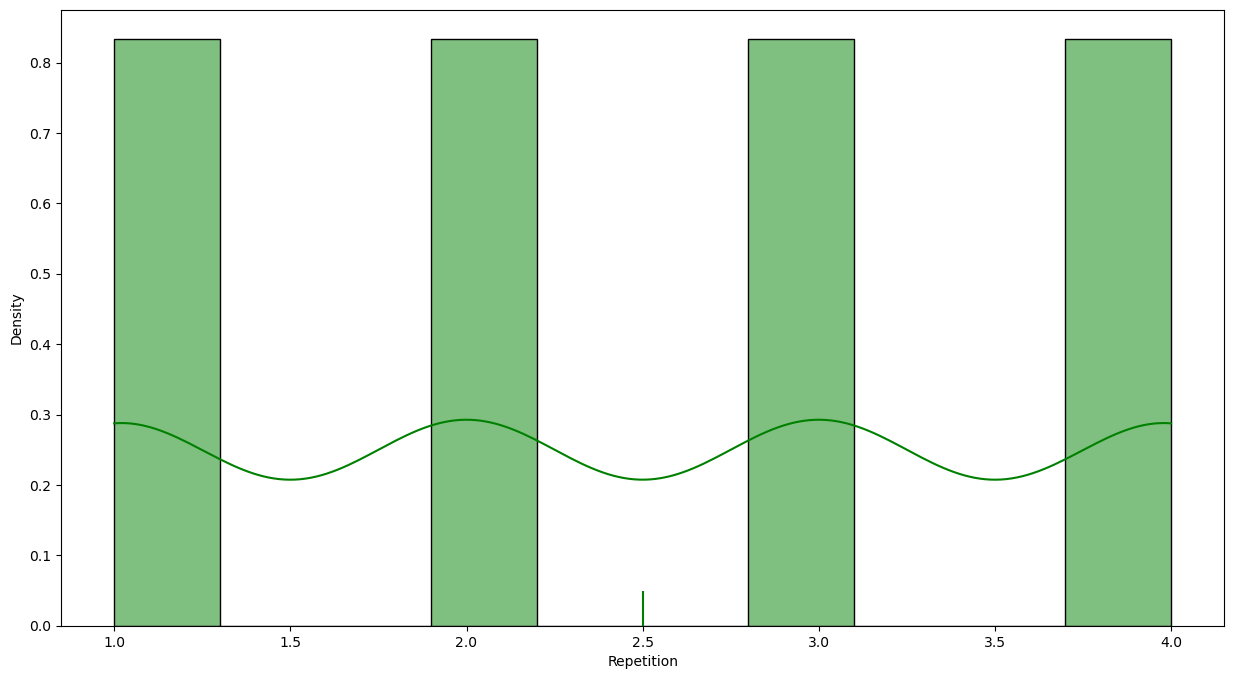

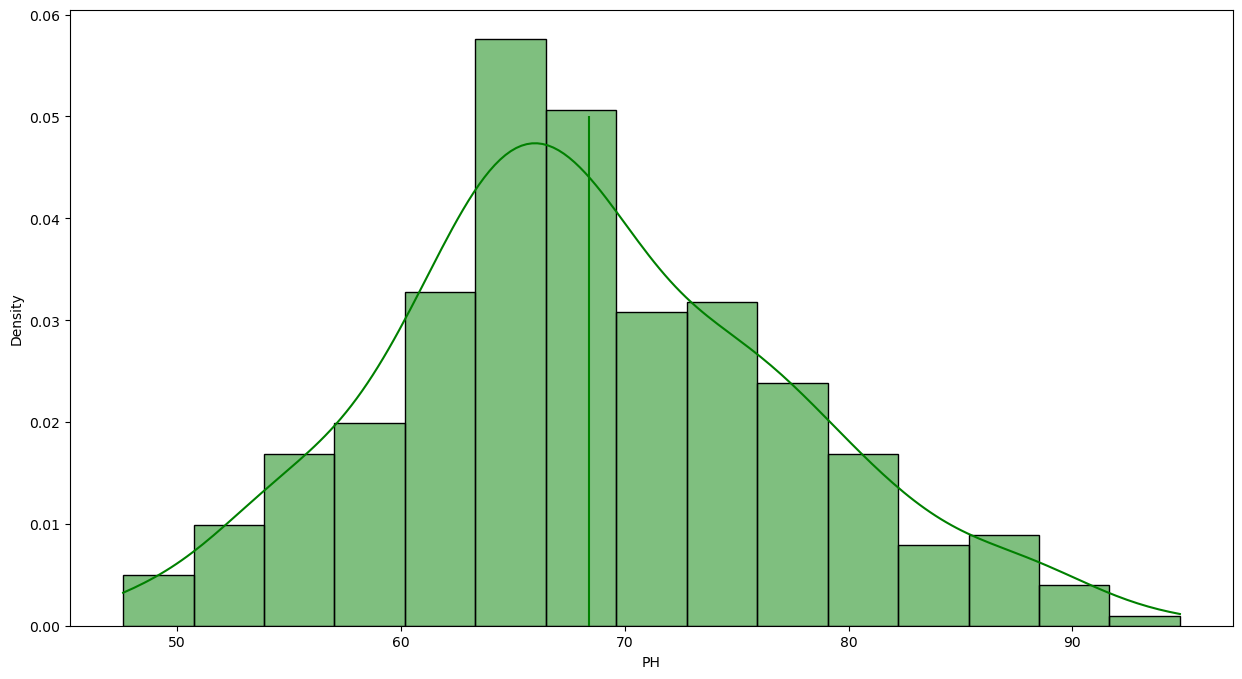

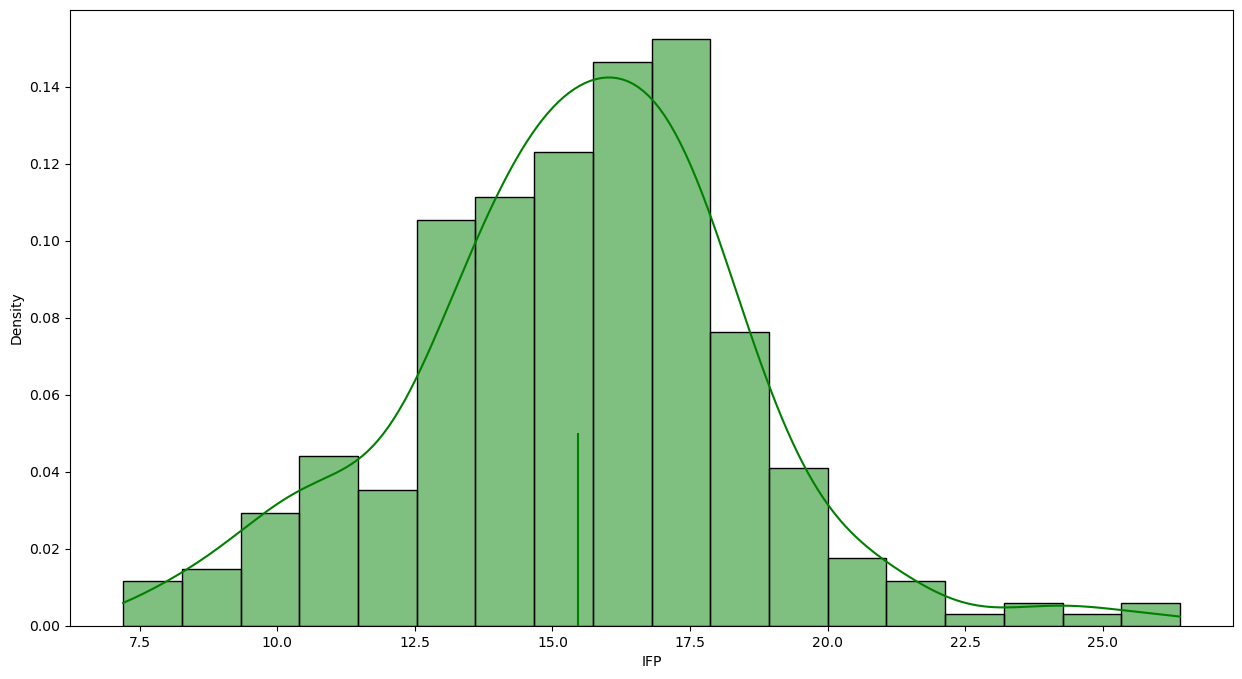

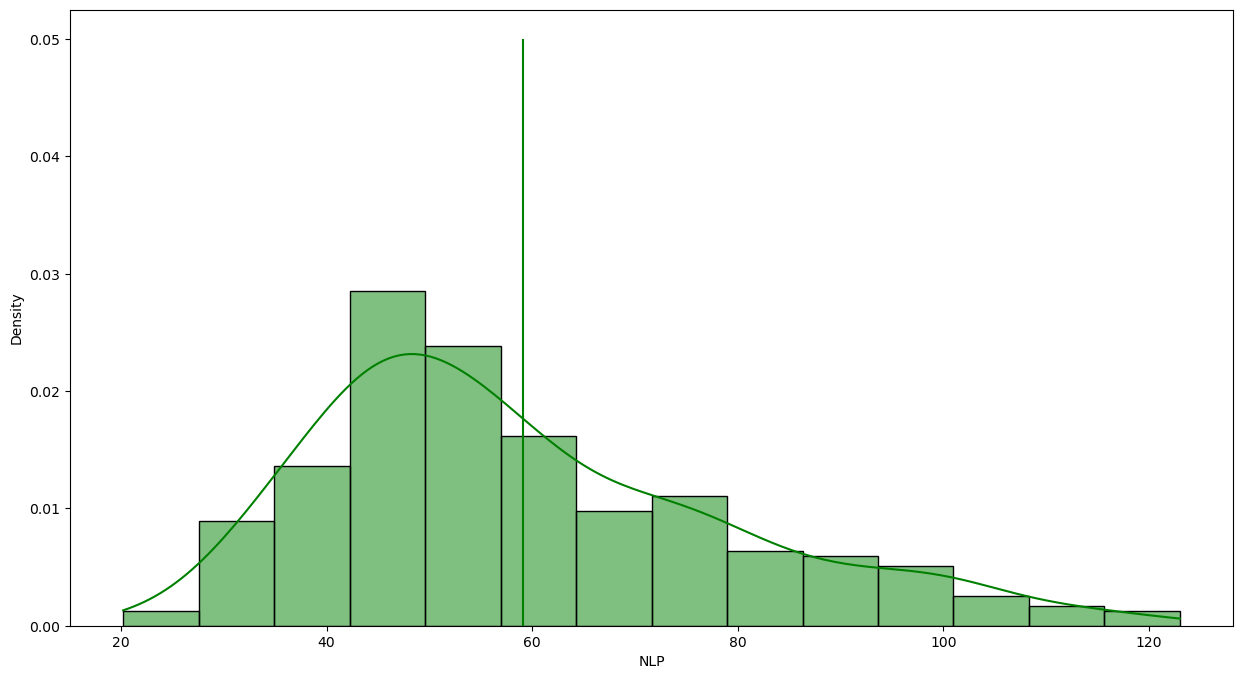

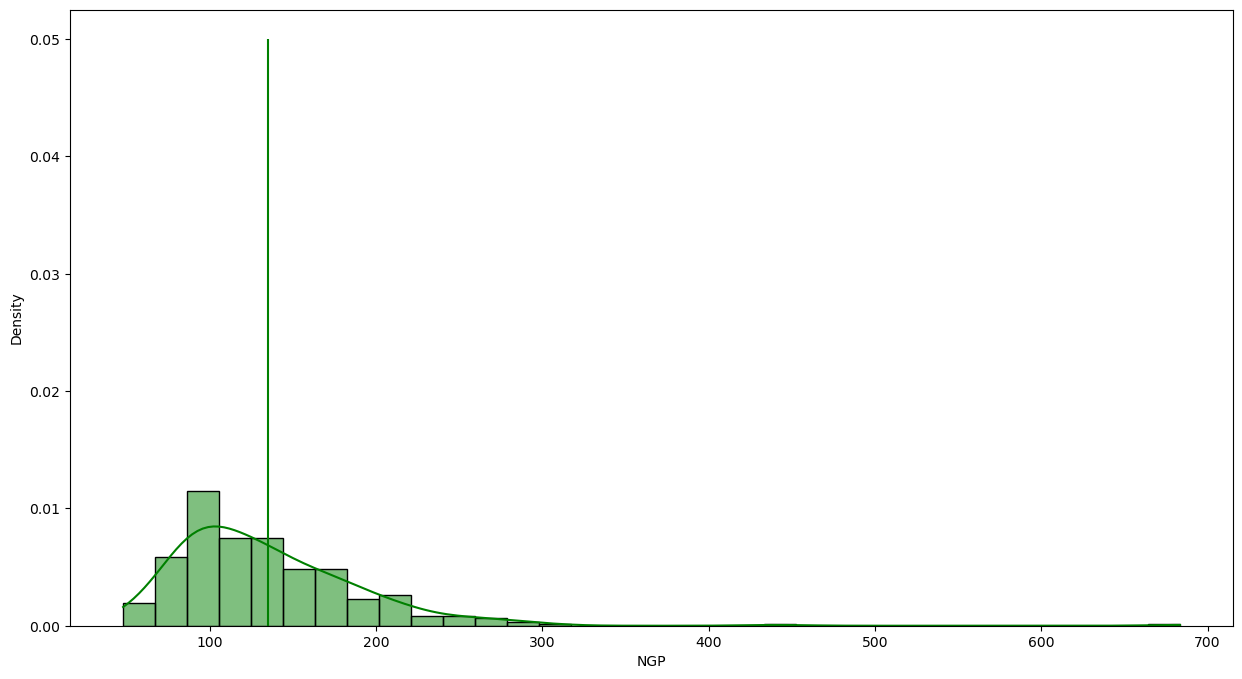

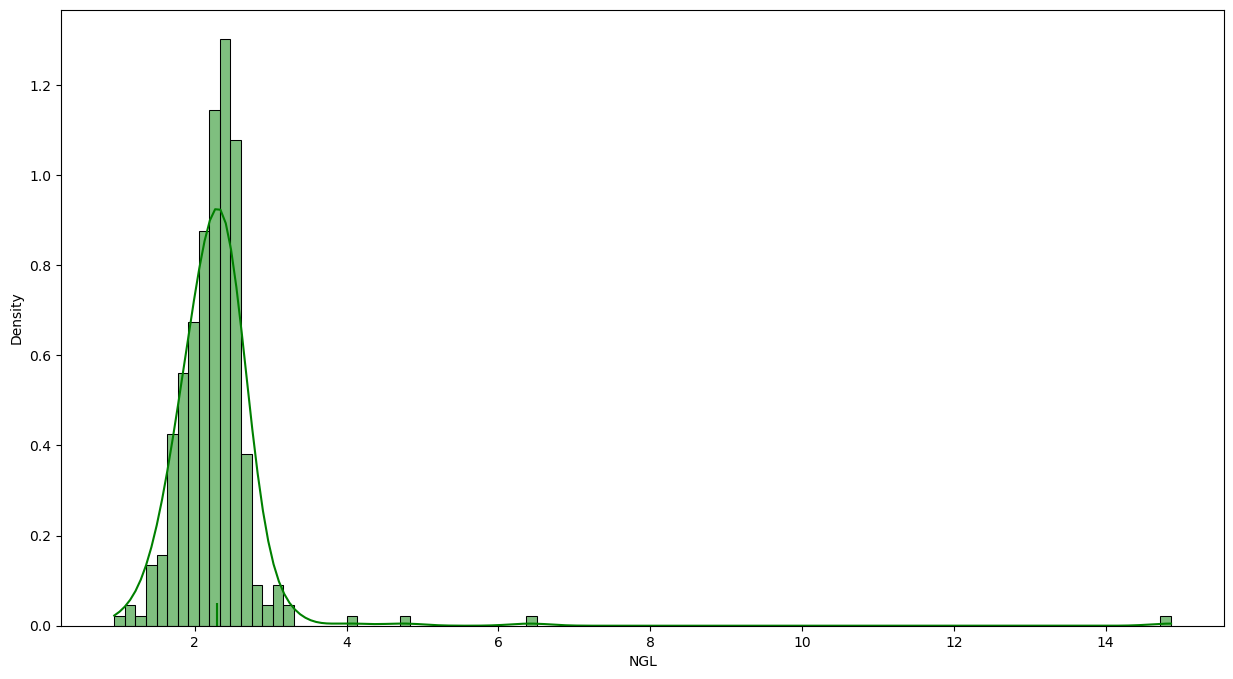

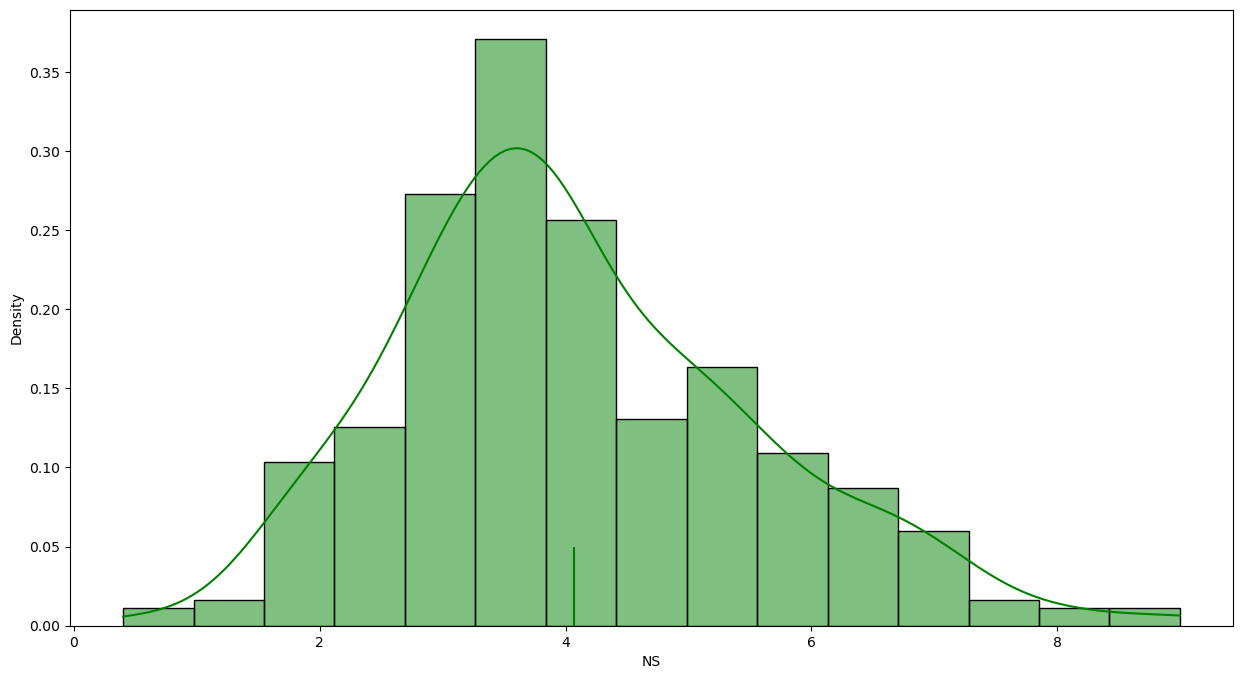

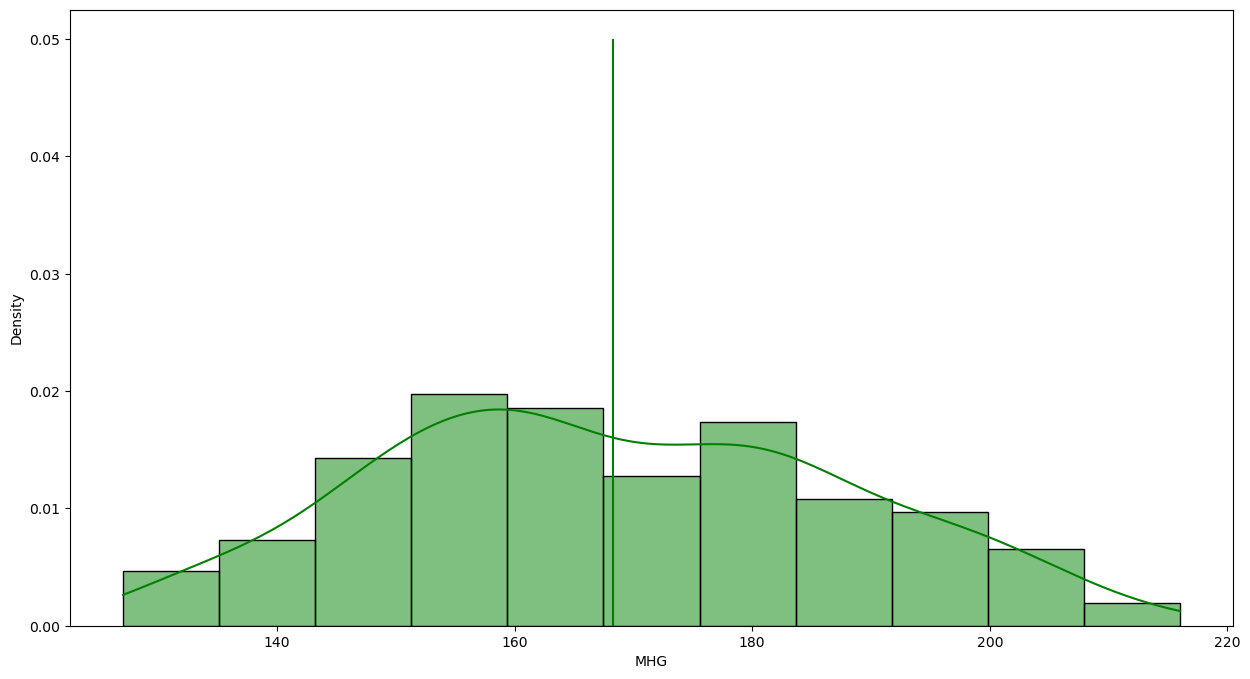

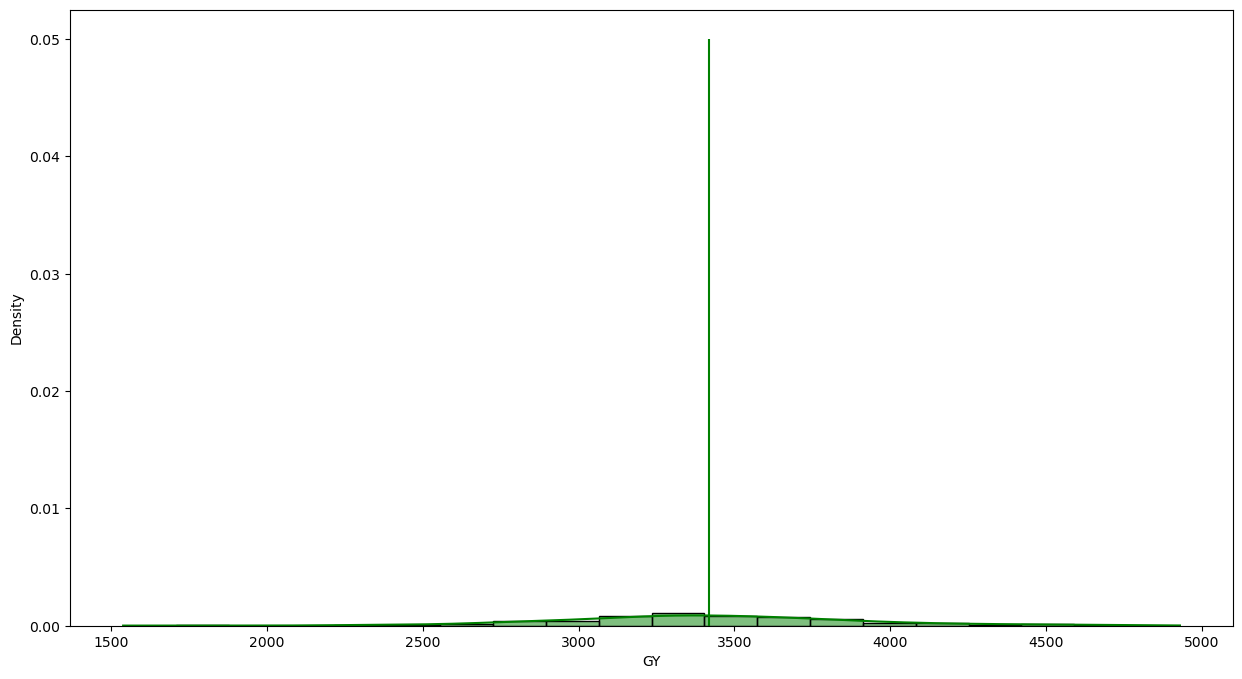

In [28]:
for item in L_num:
    plt.figure(figsize=(15,8))
    sns.histplot(data_eda[item], color = 'green', stat="density", kde=True,)
    age_mean = data_eda[item].mean()
    plt.vlines(age_mean, 0, 0.05, color = 'green')

    print(item+' mean : ', age_mean)
    print(item+' median : ', data_eda[item].median())

In [29]:
data_eda.groupby('NGL')['PH'].value_counts()

NGL    PH   
0.94   68.60    1
1.15   80.20    1
1.20   61.60    1
1.26   81.80    1
1.39   81.80    1
               ..
3.25   69.27    1
4.02   63.00    1
4.75   73.60    1
6.42   67.20    1
14.86  64.20    1
Name: count, Length: 314, dtype: int64

In [32]:
for item in L_num:
    print("-----------> "+item+" avec NGL")
    print(data_eda.groupby('NGL')[item].value_counts())

-----------> Season avec NGL
NGL    Season
0.94   1         1
1.15   2         1
1.20   2         1
1.26   2         1
1.39   2         2
                ..
3.25   1         1
4.02   2         1
4.75   1         1
6.42   2         1
14.86  2         1
Name: count, Length: 178, dtype: int64
-----------> Repetition avec NGL
NGL    Repetition
0.94   3             1
1.15   3             1
1.20   3             1
1.26   3             1
1.39   2             1
                    ..
3.25   4             1
4.02   2             1
4.75   2             1
6.42   4             1
14.86  3             1
Name: count, Length: 238, dtype: int64
-----------> PH avec NGL
NGL    PH   
0.94   68.60    1
1.15   80.20    1
1.20   61.60    1
1.26   81.80    1
1.39   81.80    1
               ..
3.25   69.27    1
4.02   63.00    1
4.75   73.60    1
6.42   67.20    1
14.86  64.20    1
Name: count, Length: 314, dtype: int64
-----------> IFP avec NGL
NGL    IFP  
0.94   14.80    1
1.15   19.20    1
1.20   16.80    

In [36]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


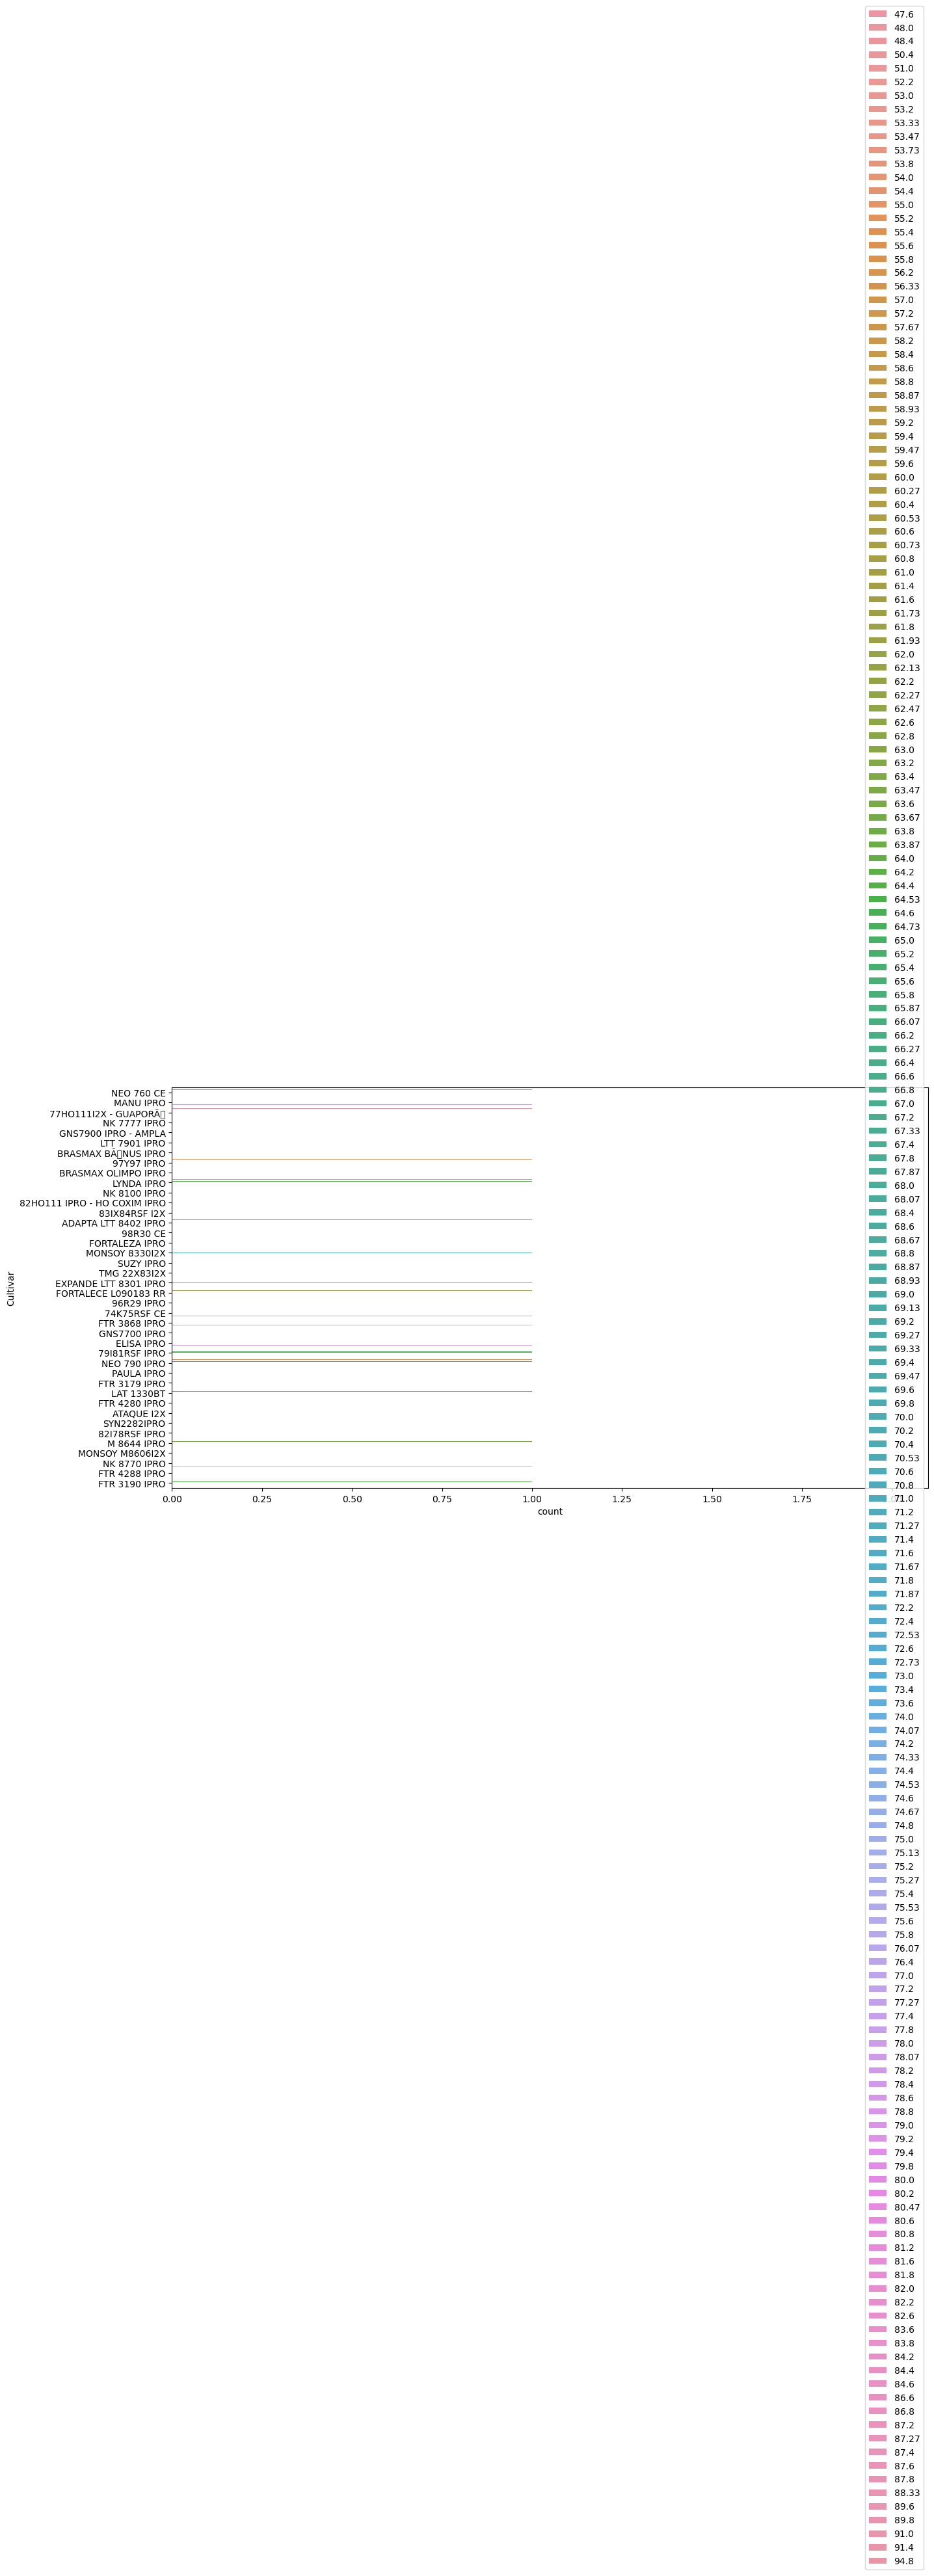

In [35]:
plt.figure(figsize=(15,8))
sns.countplot(y='Cultivar', hue='PH', data = data_eda)
plt.legend(loc = 'center right')

C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 137 (\x89) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 148 (\x94) missing from current font.
  func(*args, **kwargs)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lenovo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


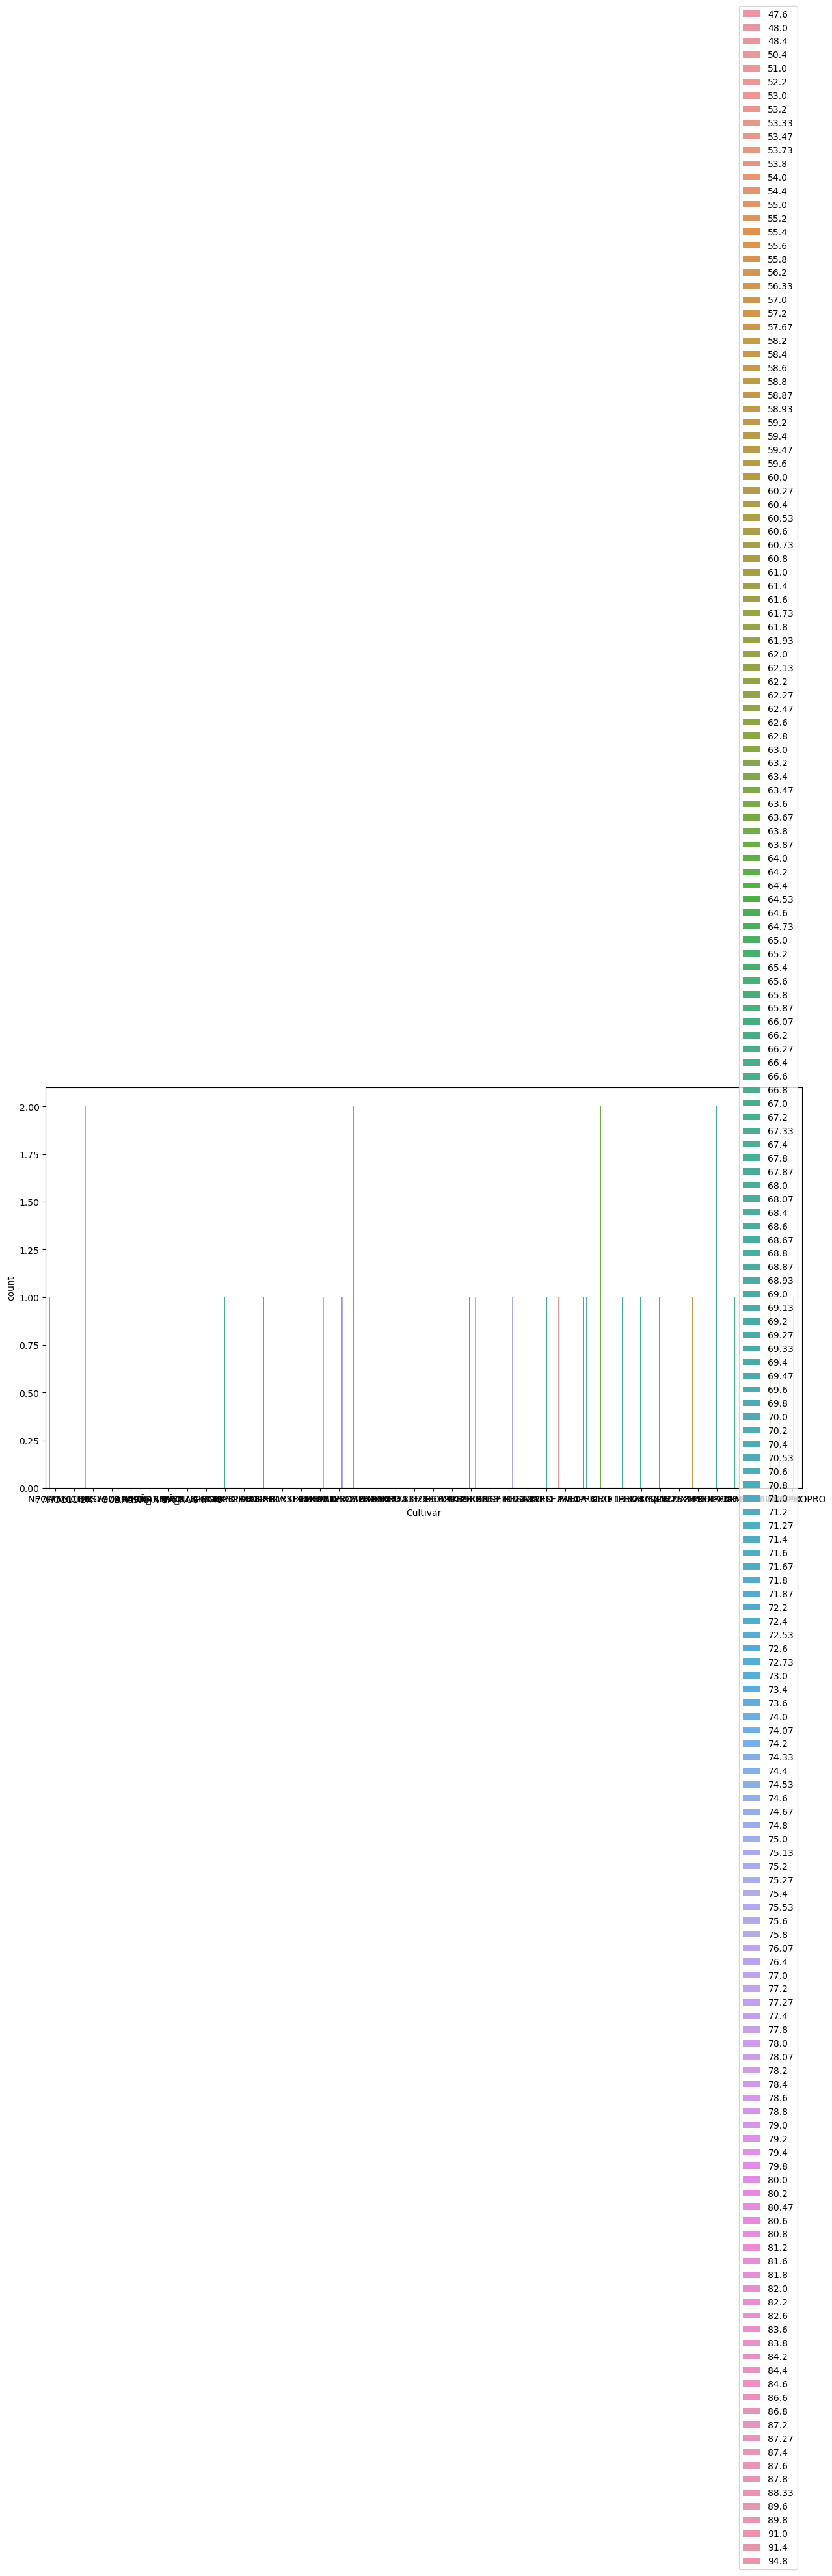

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='Cultivar', hue='PH', data = data_eda)
plt.legend(loc = 'center right')

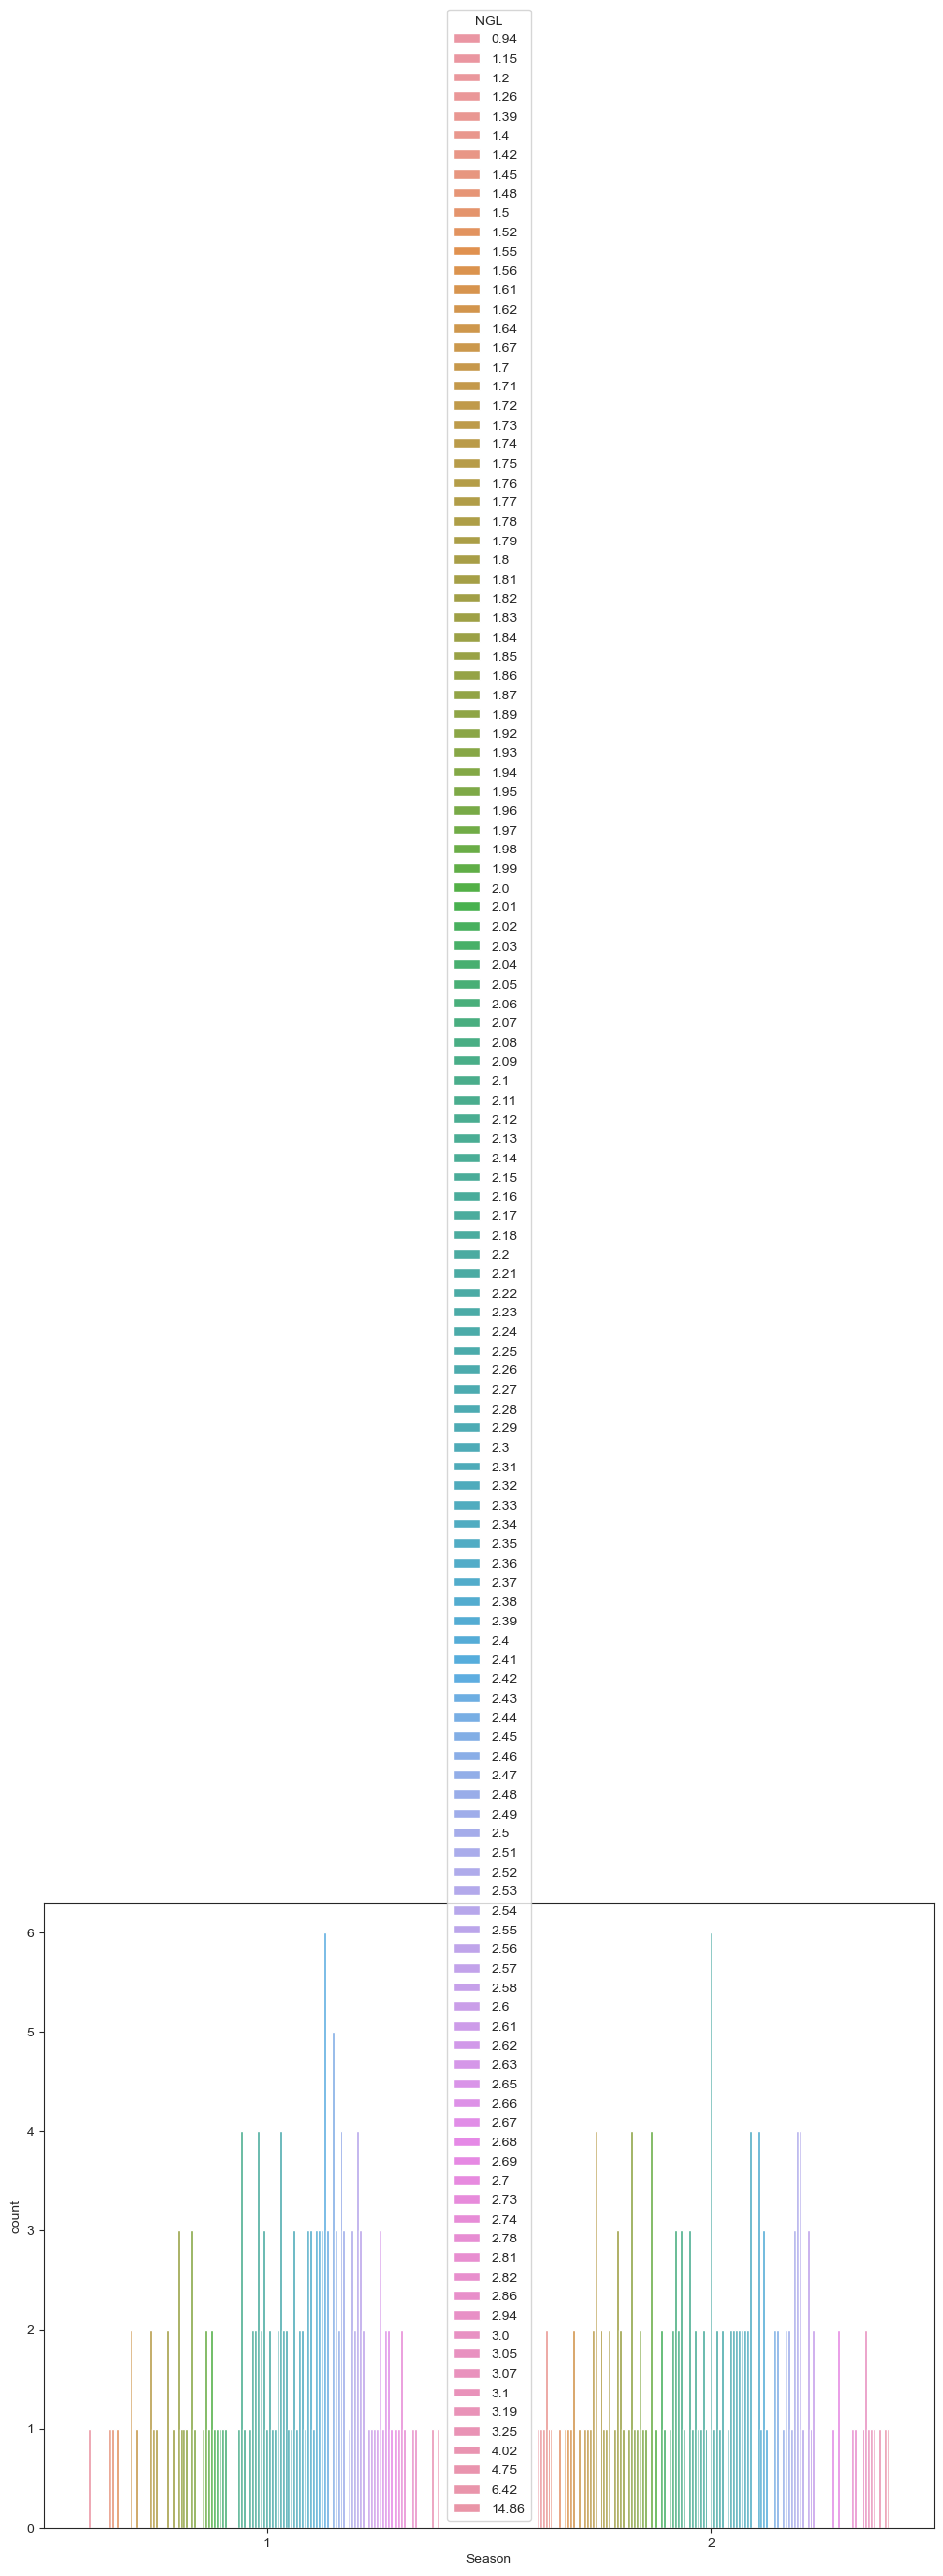

In [38]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.countplot(x="Season",hue='NGL' , data=data_eda)

In [ ]:
for item in L_num:
    print("-----------> "+item+" avec NGL")
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    ax = sns.countplot(x=item ,hue='NGL' , data=data_eda)

# Valeurs manquantes

In [7]:
import copy
data_normal = copy.deepcopy(data_eda)
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    int64  
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    int64  
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 27.6+ KB


In [8]:
data_normal.isna().sum()

Season        0
Cultivar      0
Repetition    0
PH            0
IFP           0
NLP           0
NGP           0
NGL           0
NS            0
MHG           0
GY            0
dtype: int64

# Valeurs aberrantes

In [9]:
L_num = ['Season', 'Repetition', 'PH', 'IFP', 'NLP', 'NGP', 'NGL', 'NS', 'MHG', 'GY']

In [12]:
for a in L_num:
    q1=data_normal[a].quantile(0.25)
    q3=data_normal[a].quantile(0.75)
    iqr=q3-q1
    
    lowerb= q1 - 1.5 * iqr
    upperb= q3 + 1.5 * iqr
    
    
    data_normal[a]=np.where( data_normal[a]<lowerb ,data_normal[a].mean() , data_normal[a])
    data_normal[a]=np.where( data_normal[a]>upperb ,data_normal[a].mean() , data_normal[a])



# Standarisation Data

In [13]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    float64
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    float64
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(10), object(1)
memory usage: 27.6+ KB


In [17]:
colonnes_str = ['Cultivar']

In [18]:
def normalisationStr(lits):
    d = {}
    i = 0
    for x in lits:
        d[x] = i
        i += 1
    return d

In [16]:
for x in colonnes_str:
    dicc = normalisationStr(data_normal[x].unique())
    for y in dicc:
        data_normal.loc[data_normal[x] == y, x] = dicc[y]

KeyError: 'job'

In [19]:
data_normal['Cultivar'].unique()

array(['NEO 760 CE', 'MANU IPRO', '77HO111I2X - GUAPORÃ\x89',
       'NK 7777 IPRO', 'GNS7900 IPRO - AMPLA', 'LTT 7901 IPRO',
       'BRASMAX BÃ\x94NUS IPRO', '97Y97 IPRO', 'BRASMAX OLIMPO IPRO',
       'LYNDA IPRO', 'NK 8100 IPRO', '82HO111 IPRO - HO COXIM IPRO',
       '83IX84RSF I2X', 'ADAPTA LTT 8402 IPRO', '98R30 CE',
       'FORTALEZA IPRO', 'MONSOY 8330I2X', 'SUZY IPRO', 'TMG 22X83I2X',
       'EXPANDE LTT 8301 IPRO', 'FORTALECE L090183 RR', '96R29 IPRO',
       '74K75RSF CE', 'FTR 3868 IPRO', 'GNS7700 IPRO', 'ELISA IPRO',
       '79I81RSF IPRO', 'NEO 790 IPRO', 'PAULA IPRO', 'FTR 3179 IPRO',
       'LAT 1330BT', 'FTR 4280 IPRO', 'ATAQUE I2X', 'SYN2282IPRO',
       '82I78RSF IPRO', 'M 8644 IPRO', 'MONSOY M8606I2X', 'NK 8770 IPRO',
       'FTR 4288 IPRO', 'FTR 3190 IPRO'], dtype=object)

In [21]:
d = normalisationStr(data_normal['Cultivar'].unique())
print(d)

{'NEO 760 CE': 0, 'MANU IPRO': 1, '77HO111I2X - GUAPORÃ\x89': 2, 'NK 7777 IPRO': 3, 'GNS7900 IPRO - AMPLA': 4, 'LTT 7901 IPRO': 5, 'BRASMAX BÃ\x94NUS IPRO': 6, '97Y97 IPRO': 7, 'BRASMAX OLIMPO IPRO': 8, 'LYNDA IPRO': 9, 'NK 8100 IPRO': 10, '82HO111 IPRO - HO COXIM IPRO': 11, '83IX84RSF I2X': 12, 'ADAPTA LTT 8402 IPRO': 13, '98R30 CE': 14, 'FORTALEZA IPRO': 15, 'MONSOY 8330I2X': 16, 'SUZY IPRO': 17, 'TMG 22X83I2X': 18, 'EXPANDE LTT 8301 IPRO': 19, 'FORTALECE L090183 RR': 20, '96R29 IPRO': 21, '74K75RSF CE': 22, 'FTR 3868 IPRO': 23, 'GNS7700 IPRO': 24, 'ELISA IPRO': 25, '79I81RSF IPRO': 26, 'NEO 790 IPRO': 27, 'PAULA IPRO': 28, 'FTR 3179 IPRO': 29, 'LAT 1330BT': 30, 'FTR 4280 IPRO': 31, 'ATAQUE I2X': 32, 'SYN2282IPRO': 33, '82I78RSF IPRO': 34, 'M 8644 IPRO': 35, 'MONSOY M8606I2X': 36, 'NK 8770 IPRO': 37, 'FTR 4288 IPRO': 38, 'FTR 3190 IPRO': 39}


In [23]:
for y in d:
        data_normal.loc[data_normal['Cultivar'] == y, 'Cultivar'] = d[y]

In [24]:
data_normal.head()

Season Cultivar  Repetition     PH    IFP    NLP     NGP   NGL   NS  \
0     1.0        0         1.0  58.80  15.20   98.2  177.80  1.81  5.2   
1     1.0        0         2.0  58.60  13.40  102.0  195.00  1.85  7.2   
2     1.0        0         3.0  63.40  17.20  100.4  203.00  2.02  6.8   
3     1.0        0         4.0  60.27  15.27  100.2  191.93  1.89  6.4   
4     1.0        1         1.0  81.20  18.00   98.8  173.00  1.75  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99

In [25]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    float64
 1   Cultivar    320 non-null    object 
 2   Repetition  320 non-null    float64
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(10), object(1)
memory usage: 27.6+ KB


In [27]:
data_normal['Cultivar'] = data_normal['Cultivar'].astype(int)

In [28]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      320 non-null    float64
 1   Cultivar    320 non-null    int32  
 2   Repetition  320 non-null    float64
 3   PH          320 non-null    float64
 4   IFP         320 non-null    float64
 5   NLP         320 non-null    float64
 6   NGP         320 non-null    float64
 7   NGL         320 non-null    float64
 8   NS          320 non-null    float64
 9   MHG         320 non-null    float64
 10  GY          320 non-null    float64
dtypes: float64(10), int32(1)
memory usage: 26.4 KB


# Logistique Regression

In [31]:
df1 = data_normal

Season  Cultivar  Repetition     PH    IFP    NLP     NGP   NGL   NS  \
0     1.0         0         1.0  58.80  15.20   98.2  177.80  1.81  5.2   
1     1.0         0         2.0  58.60  13.40  102.0  195.00  1.85  7.2   
2     1.0         0         3.0  63.40  17.20  100.4  203.00  2.02  6.8   
3     1.0         0         4.0  60.27  15.27  100.2  191.93  1.89  6.4   
4     1.0         1         1.0  81.20  18.00   98.8  173.00  1.75  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X=df1.drop('NGL',axis=1)
y=df1['NGL']

X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

mod = LogisticRegression(max_iter=1000)

mod.fit(X_train,y_train)

predictions = mod.predict(X_test)

accuracy = mod.score(X_test, y_test)
print("Précision du modèle :", accuracy*100)

cm = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", cm)



ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X=data_normal.drop('Cultivar',axis=1)
y=data_normal['Cultivar']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mod = LogisticRegression()

mod.fit(X_train,y_train)

predictions = mod.predict(X_test)

accuracy = mod.score(X_test, y_test)
print("Précision du modèle :", accuracy*100)

cm = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", cm)



Précision du modèle : 12.5
Matrice de confusion :
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
data_normal.head()

Season  Cultivar  Repetition     PH    IFP    NLP     NGP   NGL   NS  \
0     1.0         0         1.0  58.80  15.20   98.2  177.80  1.81  5.2   
1     1.0         0         2.0  58.60  13.40  102.0  195.00  1.85  7.2   
2     1.0         0         3.0  63.40  17.20  100.4  203.00  2.02  6.8   
3     1.0         0         4.0  60.27  15.27  100.2  191.93  1.89  6.4   
4     1.0         1         1.0  81.20  18.00   98.8  173.00  1.75  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99

In [38]:
data_normal['NGL'].unique()

array([1.81      , 1.85      , 2.02      , 1.89      , 1.75      ,
       1.7       , 1.77      , 2.3       , 2.62      , 2.33      ,
       2.42      , 2.67      , 2.78      , 2.24      , 2.56      ,
       1.64      , 2.27      , 2.22      , 2.15      , 2.14      ,
       2.17      , 2.05      , 2.21      , 2.23      , 2.66      ,
       2.73      , 2.68      , 2.        , 1.93      , 2.58      ,
       1.99      , 2.48      , 2.2       , 2.49      , 2.54      ,
       2.4       , 2.41      , 2.63      , 2.11      , 2.39      ,
       1.98      , 2.16      , 2.34      , 2.37      , 2.45      ,
       2.86      , 2.6       , 2.7       , 2.55      , 2.30526055,
       2.46      , 2.18      , 2.36      , 2.25      , 2.35      ,
       2.43      , 2.31      , 2.53      , 2.47      , 2.74      ,
       2.51      , 2.52      , 2.1       , 1.94      , 2.01      ,
       2.26      , 2.61      , 1.48      , 2.12      , 1.87      ,
       2.04      , 2.32      , 2.03      , 1.83      , 1.86   

<h1>Catégoriser la variable cible</h1>
<h3>Catégoriser la variable cible</h3>
<p>Définissez un seuil pour séparer les valeurs de y en deux classes, par exemple "Suffisant" et "Insuffisant".</p>
<p><b>"Insuffisant" si NGL < 1.5 et "Suffisant" pour NGL >= 1.5</b></p>

In [ ]:
data_normal.loc[data_normal['NGL'] < 1.5, 'NGL'] = 0
data_normal.loc[data_normal['NGL'] >= 1.5, 'NGL'] = 1

In [40]:
data_normal['NGL'].unique()

array([1., 0.])

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


X=data_normal.drop('NGL',axis=1)
y=data_normal['NGL']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

mod = LogisticRegression()

mod.fit(X_train,y_train)

predictions = mod.predict(X_test)

accuracy = mod.score(X_test, y_test)
print("Précision du modèle :", accuracy*100)

cm = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", cm)



Précision du modèle : 93.75
Matrice de confusion :
 [[ 0  2]
 [ 2 60]]


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
data_normal.head()

Season  Cultivar  Repetition     PH    IFP    NLP     NGP  NGL   NS  \
0     1.0         0         1.0  58.80  15.20   98.2  177.80  1.0  5.2   
1     1.0         0         2.0  58.60  13.40  102.0  195.00  1.0  7.2   
2     1.0         0         3.0  63.40  17.20  100.4  203.00  1.0  6.8   
3     1.0         0         4.0  60.27  15.27  100.2  191.93  1.0  6.4   
4     1.0         1         1.0  81.20  18.00   98.8  173.00  1.0  7.4   

      MHG       GY  
0  152.20  3232.82  
1  141.69  3517.36  
2  148.81  3391.46  
3  148.50  3312.58  
4  145.59  3230.99